<center><img src="https://www.insaid.co/wp-content/uploads/2022/05/INSAID-removebg-preview.png" width="240" height="100" /></center>

# <center><b>Analysis on Insaid Telecom<b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- **InsaidTelecom** is a leading telecom player in India, providing services to millions of prepaid, postpaid and fixed-line subscribers thereby generating a huge amount of call data records daily. The company plans to monetize this enormous amount of data by providing customized offerings to their clients/users.
- To remain relevant and competitive in their sector, **InsaidTelecom** employs data analytics to extract useful information from raw data to help their clients better understand and interact with their audiences. By utilizing behavioral data from more than **60%** of the **50 million mobile devices** used daily in India, they hope to achieve their goal.
- InsaidTelecom’s **consulting team** is tasked with **developing a dashboard** that would enable the customer to comprehend a user's demographic traits considering their mobile usage habits, geolocation, and mobile device features.
The business seeks to assist international developers and brand advertisers in using data-driven marketing strategies to help clients stay competitive. Based on data analysis and insights, these marketing activities will be tailored to the users and their preferences. 


---
<a name = Section2></a>
# **2. Problem Statement**
---

-	As part of routine business operations, InsaidTelecom’s consulting team has been tasked to analyze **more than 3 million** events to get rid of superfluous data silos and improve the quality and consistency of the data.
-	The company realizes that study of user’s behavioural patterns of network usage in the past could benefit them in making informed business decisions.
-	The company wishes to identify the:
        - **Niche customer segments** and their **network usage pattern**
        - **User’s preferences** based on the gender, age and demographic details
        - **Mobile usage habits**
        - **Device feature preferences**
        - **Market share** in the different parts of the country
        - **Growth opportunities**


---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

To connect to a MySQL database we need to install the corresponding connector and below is the command that you need to run
<br>
 <b>python -m pip install mysql-connector-python</b>

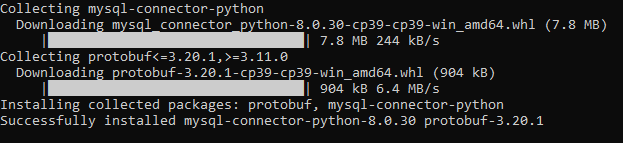 

In [ ]:
#! pip install mysql-connector-python

In [9]:
#!pip install -q datascience                                        
#!pip install -q pandas-profiling  

In [ ]:
#!pip install --upgrade pip

In [ ]:
#! pip uninstall mysql-connector-python


In [ ]:
pip install mysql-connector-python

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure **not to execute** the cell above (3.1) and below (3.2) again after restarting the runtime.

In [10]:
#!pip install -q --upgrade pandas-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [191]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
# from _version import _version.version

                                          # Python driver for communicating with MySQL servers.

#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
#-------------------------------------------------------------------------------------------------------------------------------
import datetime                                                     # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- To study the demographics of a user (gender and age) based on 'app downloads' and 'usage behaviours'.
- The Data is collected from mobile apps that used Telecom services. Full recognition and consent from an individual user of those apps have been obtained,
- Appropriate anonymization has been performed to protect privacy. Due to confidentiality, there are no details on how the gender and age data were obtained.
- We assume this data to be the accurate ground truth for prediction.

 There are 3 different data sets. 
- **gender_age_train** - Devices and their respective user, gender, age and age_group
- **phone_brand_device_model** - Device ids, brand, and models phone_brand: note that few brands are in Chinese
                Brand Name	  Brand English Mapping
                    '华为'	     'Huawei'
                    '小米'	     'Xiaomi'
                    '三星'	     'Samsung'
                    'vivo'	       'vivo'
                    'OPPO'	       'OPPO'
                    '魅族'	      'Meizu'
                    '酷派'	      'Coolpad'
                    '乐视'	      'LeEco'
                    '联想 '	      'Lenovo'
                    'HTC'	        'HTC'
- **Events_data**
    - When a user uses mobile on an INSAID Telecom network, the event gets logged in this data.
    - Each event has an event id, location (lat/long), and the event corresponds to the frequency of mobile usage. timestamp: when the user is using the mobile.

<center><b> Events_data </center></b>

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 3252950 | 7 | 173.7 MB | 

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| event_id | Sequence number starting from 1 |
|2| device_id  | Unique number which identifies a mobile device |
|3| timestamp |	Time when the event gets logged |
|4| longitude | Longitude coordinate of the Location at the time of event getting logged |
|5| latitude |	Latitude coordinate of the location at the time of event getting logged |
|6| city |	City from where the mobile network was accessed  |
|7| state  |	State from where the mobile network was accessed |

<br>

<center><b> gender_age_train </center></b>

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 74645 | 4 | 2.3 MB | 

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| device_id | Unique number which identifies a mobile device |
|2| gender | Gender of mobile user |
|3| age |	Age of mobile user |
|4| group |	Pre-determined age group to which mobile user belongs to |

<br>

<center><b> phone_brand_device_model </center></b>

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 87726 | 3 | 2 MB | 

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| device_id | Unique number which identifies a mobile device |
|2| phone_brand | Mobile device brand |
|3| device_model |	Mobile device model |


In [34]:
# Importing **events_data.csv**

df_events_data = pd.read_csv('events_data.csv')
print("Shape of events_data dataset is :",df_events_data.shape)
df_events_data.head()

Shape of events_data dataset is : (3252950, 7)


,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2973347786994914304.00000,2016-05-07 22:52:05,77.22568,28.73014,Delhi,Delhi
1,2955066,4734221357723754496.00000,2016-05-01 20:44:16,88.38836,22.66033,Calcutta,WestBengal
2,605968,-3264499652692492800.00000,2016-05-02 14:23:04,77.25681,28.75791,Delhi,Delhi
3,448114,5731369272434022400.00000,2016-05-03 13:21:16,80.34361,13.15333,Chennai,TamilNadu
4,665740,338888002570799936.00000,2016-05-06 03:51:05,85.99774,23.84261,Bokaro,Jharkhand


In [35]:
# Connecting to MySQL Database to get gender_age & phone_brand_device_model datasets

import mysql.connector    
mySqldb = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  password="student",
  database='Capstone1'
)

In [36]:
# Get gender_age Dataset into Dataframe

df_gender_age  = pd.read_sql('SELECT * FROM gender_age_train', con=mySqldb)
print("Shape of gender_age_train dataset is :",df_gender_age.shape)
df_gender_age.head()

Shape of gender_age_train dataset is : (74645, 4)


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [37]:
# Get phone_brand_device_model Dataset into Dataframe

df_phonebr_devicemod  = pd.read_sql('SELECT * FROM phone_brand_device_model', con=mySqldb)
print("Shape of phone_brand_device_model dataset is :",df_phonebr_devicemod.shape)
df_phonebr_devicemod.head()

Shape of phone_brand_device_model dataset is : (87726, 3)


,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [38]:
df_events_data.describe(include ='all')

,event_id,device_id,timestamp,longitude,latitude,city,state
count,3252950.00000,3252497.00000,3252950,3252527.00000,3252527.00000,3252950,3252573
unique,NaN,NaN,588126,NaN,NaN,933,32
top,NaN,NaN,2016-05-03 10:00:03,NaN,NaN,Delhi,Delhi
freq,NaN,NaN,43,NaN,NaN,744276,751733
mean,1626475.50000,101220009585509024.00000,NaN,78.15868,21.68851,NaN,NaN
std,939045.92342,5316758188197051392.00000,NaN,4.23557,5.78911,NaN,NaN
min,1.00000,-9222956879900150784.00000,NaN,12.56700,8.19011,NaN,NaN
25%,813238.25000,-4540611333857475072.00000,NaN,75.83543,17.80171,NaN,NaN
50%,1626475.50000,172682011159278816.00000,NaN,77.26814,22.16454,NaN,NaN
75%,2439712.75000,4861813234983622656.00000,NaN,80.31916,28.68278,NaN,NaN


**Observations:**
- For **event_id** is a sequence number starts with 1 and the last record is 3252950th record
- **device_id** column has negative values, which does not seem to be correct.Though it is merely an identifier, will be retained.
- Count of values in **device_id** , **longitutude**, **latititude** and **state** columns is representative of some missing data
- **City , State and Timestamp** belong to **object** datatype, therefore central tendencies and std. deviation are shown as NaN values

In [39]:
df_gender_age['age'].skew()

1.369816341801678

**Observations:**

- **Minimum age** is **1**.  **Maximum age** is **96**. Both of these could be considered outliers
- For age feature, Mean is more than median which indicates a **right skew**.
- Count of **device_id** and **age** suggests that there are no missing values

In [40]:
df_phonebr_devicemod.describe(include ='all')

,device_id,phone_brand,device_model
count,87726.00000,87726,87726
unique,NaN,116,1467
top,NaN,小米,红米note
freq,NaN,21645,3500
mean,-5212556568047306.00000,NaN,NaN
std,5330156982713820160.00000,NaN,NaN
min,-9223321966609553408.00000,NaN,NaN
25%,-4623331173682123776.00000,NaN,NaN
50%,-31098020763804488.00000,NaN,NaN
75%,4635193992006549504.00000,NaN,NaN


**Observations:**

- There are **116** unique phone brands and **1467** models
- A few of the Phone brand and Device Model have chinese names.Of which we need to perform translation for phone brands to perform analysis 

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [41]:
df_events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


**Observations:**

- There are **7 features** with **32,52,950 observations**.

- **event_id** is of **int64** datatype.

- **device_id**,  **longitude** and **latitude** are of **float64** datatype.

- **city**, **timestamp** and **state** are of **object** datatypes. **timestamp** needs to be converted to **datetime**


In [42]:
df_gender_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


**Observations:**

- There are **4 features** with **74,645 observations**.

- **device_id** and **age** are of **int64** datatype.

- **gender** and **group** are of **object** type.


In [43]:
df_phonebr_devicemod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


**Observations:**

- There are **3 features** with a total of **87,726**  records that exist in phonebrand and devicemodel 
   **df_phonebr_devicemod** dataset with no missing values

- **device_id** is of **int64** datatype.

- **phone_brand** and **device_model** are of **object** type.

<a name = Section5></a>

---
# **5. Data Pre-Profiling**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [194]:
profile = ProfileReport(df = df_events_data)
profile.to_file(output_file = 'PreProfilingReport_Events.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [195]:
profile = ProfileReport(df = df_gender_age)
profile.to_file(output_file = 'PreProfilingReport_genderage.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [196]:

profile = ProfileReport(df = df_phonebr_devicemod)
profile.to_file(output_file = 'PreProfilingReport_phonebr_devicemo.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


- **Check for Missing Values**

In [45]:
# Checking for Missing values in df_events_data data set
df_events_data.isna().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [46]:
# Checking for Missing values in df_gender_age_train data set
df_gender_age.isna().sum()

device_id    0
gender       0
age          0
group        0
dtype: int64

In [47]:
# Checking for Missing values in df_phonebr_devicemod data set
df_phonebr_devicemod.isna().sum()

device_id       0
phone_brand     0
device_model    0
dtype: int64

- **Check for Duplicate Values**

In [48]:
# Finding duplicates
print("Duplicate rows in 'events_data' data set : {} ".format(df_events_data.iloc[:,:].duplicated().sum()))
print("Duplicate rows in 'gender_age_train' data set : {} ".format(df_gender_age.duplicated().sum()))
print("Duplicate rows in 'phone_brand_device_model' data set : {} ".format(df_phonebr_devicemod.duplicated().sum()))

Duplicate rows in 'events_data' data set : 0 
Duplicate rows in 'gender_age_train' data set : 0 
Duplicate rows in 'phone_brand_device_model' data set : 0 


In [49]:
# Unique values existed in features in the events_data dataset
df_events_data.nunique()

event_id     3252950
device_id      60865
timestamp     588126
longitude      60095
latitude       60177
city             933
state             32
dtype: int64

In [50]:
# Unique values existed in features in the gender_age_train data set
df_gender_age.nunique()

device_id    74645
gender           2
age             85
group           12
dtype: int64

In [51]:
# Male Female Counts
df_gender_age['gender'].value_counts()

M    47904
F    26741
Name: gender, dtype: int64

In [52]:
# Male Female %Proportion
# With normalize set to True, returns the relative frequency by dividing all values by the sum of values.
df_gender_age['gender'].value_counts(normalize=True)*100

M   64.17577
F   35.82423
Name: gender, dtype: float64

In [53]:
# Unique values existed in features in the phone_brand_device_model data set
df_phonebr_devicemod.nunique()

device_id       87726
phone_brand       116
device_model     1467
dtype: int64

In [54]:
# Percent Proportion of Age-Group
df_gender_age['group'].value_counts(normalize=True)*100

M23-26   12.86757
M32-38   12.69476
M39+     11.49575
M22-     10.03148
M29-31    9.79168
F33-42    7.44993
M27-28    7.29453
F23-      6.76536
F29-32    6.20001
F43+      5.61859
F24-26    5.61324
F27-28    4.17710
Name: group, dtype: float64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

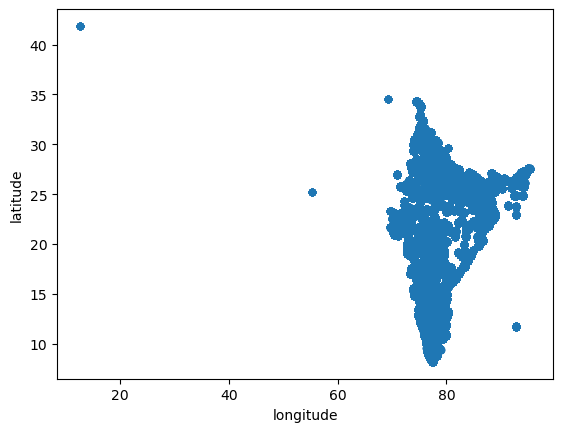

In [55]:
# Scatter plot to see if latitudes and longitudes are all within India
df_events_data.plot(x="longitude", y="latitude", kind="scatter",
        colormap="YlOrRd")

**Observations for events_data :**

- There are **7 features** with **32,52,950 observations** in the dataset.

- **device_id**, **longitude**, **latitude** and **state** features have 453, 423, 423, 377 **missing** values.

- There are no duplicate rows.

- There are **60865** unique device ids.

- There are **933** unqiue cities from **32** different states

- There seem to be some data which have latitude/longitude outside india (Can infer from the scatter plot)

**Observations for gender_age_train :**

- There are **4 features** with **74,645 observations** in the dataset.

- There are no duplicate rows.

- There are **74645** unique device ids.

- **64%** owners of device ids are male when compared to **36%** females.

- There are **12** different age groups, **6** each belonging to Male and Female.

- **23-26** is the most dominant group in males whereas it is **33-42** in females.

**Observations for phone_brand_device_model :**

- There are **3 features** with **87,726 observations** in the dataset.

- There are no duplicate rows.

- There are **87726** unique device ids.

- There are **116** phone brands and **1467** device models in total.

<a name = Section6></a>

---
# **6. Data Cleaning**
---

#### Perform the **cleaning** operations over the features in **events_data** dataset using information from the previous section.

- Fill **missing** values for **state** feature on the basis of the corresponding cities that exist in the **city** feature.

- Filter the events_data for 6 states - 'TamilNadu','Manipur', 'Chandigarh', 'Tripura', 'UttarPradesh', 'ArunachalPradesh' as analysis is to be performed for these states only.

- Once state values get filled, fill the **missing** values for **latitude**, **longitude** and **device_id**.

- Check for rows with **incorrect latitude/longitude** and take appropriate action.

- Check for **typos** in **city names** as we explore incorrect latitude/longitudes.

- Change dtype for **timestamp** feature to **datetime64** from **object**

- Change dtype for **device_id** feature in **gender_age_train** and  **phone_brand_device_model** to **float** to facilitate merge operation

- Perform mapping of **Chinese names** to their **English names** for Phone brand

### 6.1 Missing values imputation for State in Events dataset

In [25]:
## Cities for which corresponding state values are null
# Check the missing values for State
print('Number of unique cities against which state field is null :', df_events_data[df_events_data['state'].isnull()]['city'].nunique())
cities = df_events_data[df_events_data['state'].isnull()]['city'].unique()
print('Unique cities against which state field is null :', cities)

Number of unique cities against which state field is null : 9
Unique cities against which state field is null : ['Pune' 'Visakhapatnam' 'Indore' 'Chennai' 'Delhi' 'Channapatna' 'Jaipur'
 'Gangarampur' 'Arambagh']


In [27]:
#Building  dictionary of city and corresponding state for those cities against which state is null 
cityStateDict = {} 
for city in cities:
    stateList = df_events_data[df_events_data['city'] == city]['state'].dropna().unique()
    if(stateList.size == 1):
        cityStateDict[city] = stateList[0]
print(cityStateDict)

{'Pune': 'Maharashtra', 'Visakhapatnam': 'AndhraPradesh', 'Indore': 'MadhyaPradesh', 'Chennai': 'TamilNadu', 'Delhi': 'Delhi', 'Channapatna': 'Karnataka', 'Jaipur': 'Rajasthan', 'Gangarampur': 'WestBengal', 'Arambagh': 'WestBengal'}


In [57]:
# Filling missing values for state
df_events_data_modified = df_events_data.copy()
df_events_data_modified['state'] = df_events_data_modified.state.fillna(df_events_data_modified.city.map(cityStateDict))

In [31]:
print('Missing state values in original dataset' ,df_events_data['state'].isna().sum())
print('Missing state values in modified dataset' ,df_events_data_modified['state'].isna().sum())

Missing state values in original dataset 377
Missing state values in modified dataset 0


### 6.2 Filtering 6 states from Events data set

In [58]:
#We have to focus only on below states
statesToFocus = ['TamilNadu','Manipur', 'Chandigarh', 'Tripura', 'UttarPradesh', 'ArunachalPradesh'] 
    
# Creating new Data Frame with these states only 
filtered_events_data_df = df_events_data_modified[df_events_data_modified['state'].isin(statesToFocus)] 

In [59]:
# Checking for missing values in the filtered events_data
filtered_events_data_df.isna().sum()

event_id      0
device_id    63
timestamp     0
longitude    63
latitude     63
city          0
state         0
dtype: int64

### 6.3 Missing values imputation for Latitude and Longitude in Events dataset 

In [60]:
# All missing values are from TamilNadu state
device_id_null_df = filtered_events_data_df[filtered_events_data_df['device_id'].isna()]
print(device_id_null_df['state'].unique())
print(device_id_null_df['city'].unique())
coordinates_null_df = filtered_events_data_df[filtered_events_data_df['longitude'].isna() & filtered_events_data_df['latitude'].isna()]
print(coordinates_null_df['state'].unique())
print(coordinates_null_df['city'].unique())

['TamilNadu']
['Chennai']
['TamilNadu']
['Chennai']


In [67]:
# There are only 3 unique device ids for which latitude and longitude info is missing and there are 21 instances of each.
coordinates_null_df['device_id'].value_counts()

7983871429718484992.00000    21
7662139143719919616.00000    21
5731369272434022400.00000    21
Name: device_id, dtype: int64

In [68]:
#Building  dictionary of device id and corresponding latitude and longitude
deviceLatitudeDict = {} 
deviceLongitudeDict = {} 
deviceids = [7983871429718484992.00000,7662139143719919616.00000,5731369272434022400.00000]
for deviceid in deviceids:
    longitudeList = filtered_events_data_df[filtered_events_data_df['device_id'] == deviceid]['longitude'].dropna().unique()
    latitudeList = filtered_events_data_df[filtered_events_data_df['device_id'] == deviceid]['latitude'].dropna().unique()
    if(longitudeList.size == 1):
        deviceLongitudeDict[deviceid] = longitudeList[0]
    if(latitudeList.size == 1):
        deviceLatitudeDict[deviceid] = latitudeList[0]
print(deviceLatitudeDict)
print(deviceLongitudeDict)

{7.983871429718485e+18: 13.189053, 7.66213914371992e+18: 13.149176, 5.731369272434022e+18: 13.153332}
{7.983871429718485e+18: 80.33543499999998, 7.66213914371992e+18: 80.30927199999998, 5.731369272434022e+18: 80.34361299999998}


In [69]:
# From above, we realize that there is exactly one combination of latitude/longitude for each of the 3 device id's and hence we will replace the null values with these
filtered_events_data_df['longitude'] = filtered_events_data_df.longitude.fillna(filtered_events_data_df.device_id.map(deviceLongitudeDict))
filtered_events_data_df['latitude'] = filtered_events_data_df.latitude.fillna(filtered_events_data_df.device_id.map(deviceLatitudeDict))

In [64]:
# Checking for missing values post filling latitude and longitude in previous step
filtered_events_data_df.isna().sum()

event_id      0
device_id    63
timestamp     0
longitude     0
latitude      0
city          0
state         0
dtype: int64

### 6.4 Missing values imputation for Device Id in Events dataset 

In [65]:
# There are only 3 unique longitude and latitude pairs for which device id is missing.
device_id_null_df.groupby(['latitude','longitude']).size()

latitude  longitude
13.14918  80.30927     21
13.15333  80.34361     21
13.18905  80.33543     21
dtype: int64

In [66]:
print(filtered_events_data_df[np.isclose(filtered_events_data_df['latitude'],13.14918) & np.isclose(filtered_events_data_df['longitude'],80.30927)]['device_id'].dropna().value_counts())
print(filtered_events_data_df[np.isclose(filtered_events_data_df['latitude'],13.15333) & np.isclose(filtered_events_data_df['longitude'],80.34361)]['device_id'].dropna().value_counts())
print(filtered_events_data_df[np.isclose(filtered_events_data_df['latitude'],13.18905) & np.isclose(filtered_events_data_df['longitude'],80.33543)]['device_id'].dropna().value_counts())

7662139143719919616.00000    3485
Name: device_id, dtype: int64
5731369272434022400.00000    3513
Name: device_id, dtype: int64
7983871429718484992.00000    3419
Name: device_id, dtype: int64


In [70]:
#Filling null device_id
eventDeviceIdDict = {} 
eventIds = device_id_null_df['event_id']
for eventId in eventIds:
    filteredRow = filtered_events_data_df[filtered_events_data_df['event_id'] == eventId]
    if(np.isclose(filteredRow['latitude'],13.14918) & np.isclose(filteredRow['longitude'],80.30927)):  
        filtered_events_data_df.loc[filtered_events_data_df['event_id'] == eventId, 'device_id'] = 7662139143719919616
    elif(np.isclose(filteredRow['latitude'],13.15333) & np.isclose(filteredRow['longitude'],80.34361)):    
        filtered_events_data_df.loc[filtered_events_data_df['event_id'] == eventId, 'device_id'] = 5731369272434022400
    else:
         filtered_events_data_df.loc[filtered_events_data_df['event_id'] == eventId, 'device_id'] = 7983871429718484992

In [71]:
# Checking for missing values post filling device_id in previous step
filtered_events_data_df.isna().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

In [72]:
# Checking for distribution of event data across states.
filtered_events_data_df['state'].value_counts()

TamilNadu           436329
UttarPradesh         94750
Manipur                989
Chandigarh             894
Tripura                892
ArunachalPradesh       608
Name: state, dtype: int64

### 6.5 Checking for Outliers in Latitude/Longitude in Event dataset

In [111]:
# Change this to True if you want to save the folium maps to local and then look at them individually which we had done during the analysis phase
runFoliumAnalysis = True


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

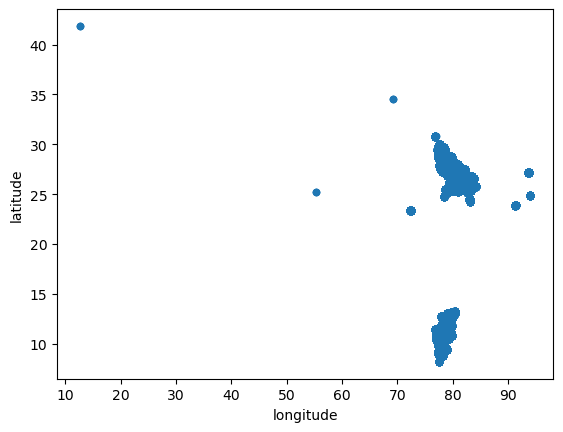

In [74]:
# Scatter plot to get a high level overview if there exists any incorrect latitude/longitude in our filtered dataset.
filtered_events_data_df.plot(x="longitude", y="latitude", kind="scatter", colormap="YlOrRd")

In [81]:
#pip install folium
import folium

In [113]:
# Defining a function to plot latitude/longitude on a map using Folium
def saveMap(LocationDF, fileName):
    map = folium.Map(location=[LocationDF.latitude.mean(), LocationDF.longitude.mean()], zoom_start=10, control_scale=True)
    for index, location_info in LocationDF.iterrows():
        folium.Marker([location_info["latitude"], location_info["longitude"]], popup=location_info["city"]).add_to(map)
#     fig=Figure(width=900,height=600)
#     return fig.add_child(map) 
#     map_html = map._repr_html_()
#     return {"map": map_html}
    map.save(fileName)

In [114]:
# No incorrect latitude and longitude for Arunachal
if(runFoliumAnalysis):
    Arunachal_locations = filtered_events_data_df[filtered_events_data_df['state']=='ArunachalPradesh'][["latitude", "longitude", "city"]] 
    saveMap(Arunachal_locations,'Arunachal.html')

In [115]:
# No incorrect latitude and longitude for Tripura
if(runFoliumAnalysis):
    Tripura_locations = filtered_events_data_df[filtered_events_data_df['state']=='Tripura'][["latitude", "longitude", "city"]] 
    saveMap(Tripura_locations,"Tripura.html")

In [116]:
# No incorrect latitude and longitude for Chandigarh
if(runFoliumAnalysis):
    Chandigarh_locations = filtered_events_data_df[filtered_events_data_df['state']=='Chandigarh'][["latitude", "longitude", "city"]] 
    saveMap(Chandigarh_locations,"Chandigarh.html")

In [117]:
# No incorrect latitude and longitude for Manipur
if(runFoliumAnalysis):
    Manipur_locations = filtered_events_data_df[filtered_events_data_df['state']=='Manipur'][["latitude", "longitude", "city"]] 
    saveMap(Manipur_locations,"Manipur.html")

In [118]:
# UttarPradesh has 94,750 rows which resulted in 65 MB file which is not responding in browser when opened. 
# Hence will split the dataset by cities
up_cities_df = filtered_events_data_df[filtered_events_data_df['state']=='UttarPradesh']
citiesList = up_cities_df['city'].unique()
cityCount = up_cities_df['city'].value_counts().to_dict()

In [119]:
if(runFoliumAnalysis):
    for city in citiesList:
        df = up_cities_df[up_cities_df['city'] == city][["latitude", "longitude", "city"]] 
        count = cityCount[city]
        saveMap(df,"up_" + city + "_" + str(count) + ".html")

Agra - 1440, Aligarh - 583, Allahabad - 912, Amroha - 504, Aonla - 1430, Auraiya - 949, Ayodhya - 551, Azamgarh - 794, Baheri - 683, Bahraich - 677, Ballia - 833, Balrampur - 631, Banda - 930, Baraut - 769, Bareli - 1238, Basti - 929, Bela - 892, Bhadohi - 664, Bijnor - 654, Bisalpur - 1558, Biswan - 515, Budaun - 614, Bulandshahr - 680, Chandausi - 1502, Chandpur - 597, Chhibramau - 475, Dadri - 629, Deoband - 526, Deoria - 502, Etah - 773, Etawah - 722, Faizabad - 487, Faridpur - 767, Farrukhabad - 885, Fatehpur - 460, Firozabad - 1039, Gajraula - 681, GangaGhat - 969, Gangoh - 659, Ghaziabad - 583, Ghazipur - 921, GolaGokarannath - 792, Gonda - 431, Gorakhpur - 992, Hapur - 874, Hardoi - 904, Hasanpur - 898, Hathras - 1099, Jahangirabad - 691, Jalaun - 611, Jaunpur - 697, Jhansi - 744, Kairana - 495, Kannauj - 714, Kanpur - 1055, KanpurCantonment - 1147, Kasganj - 616, Khatauli - 971, Khurja - 1000, Kiratpur - 832, KosiKalan - 730, Laharpur - 756, Lakhimpur - 668, Lalitpur - 1255, Loni - 641, Mahoba - 930, Mainpuri - 1079, Mathura - 884, Mau - 828, Mauranipur - 726, Mawana - 556, Mirzapur - 1063, Moradabad - 1054, Mubarakpur - 730, MughalSarai - 690, Muradnagar - 695, Muzaffarnagar - 331, Nagina - 1098, Najibabad - 577, Nawabganj - 627, Noida - 621, Obra - 667, Orai - 500, Pilibhit - 1210, Pilkhuwa - 573, RaeBareli - 712, Rampur - 834, Rath - 1078, Renukut - 967, Saharanpur - 926, Sahaswan - 748, Sambhal - 665, Sandila - 408, Shahabad - 578, Shahjahanpur - 746, Shamli - 661, Sherkot - 1264, Shikohabad - 1395, Sikandarabad - 646, Sitapur - 1381, Sultanpur - 740, Tanda - 1491, Tilhar - 823,  Tundla - 703, Ujhani - 925, Unnao - 679, Varanasi - 1633, Vrindavan - 732

#### Typo Names
1. ChitrakutDham - 563. Should be ChitrakootDham
2. Lakhnau - 1629. Should be Lucknow
3. LakhnauCantonment - 288. Should be LucknowCantonment
4. Mirat - 1069. Should be Meerut
5. MiratCantonment - 728. Should be MeerutCantonment
#### Incorrect Latitudes/Longitudes
1. Kadi - 947 records. Lies in Gujarat and not in UP.Need to drop these rows as Gujarat is not one of our states.
2. Modinagar - 1132 records. Latitudes/Longitudes mentioned are in Meerut
3. Muradnagar - 695 records. Latitudes/Longitudes mentioned are in Modinagar.


#### Correcting Typos in UP city names

In [124]:
#Correcting typos
filtered_events_data_df['city'] = filtered_events_data_df['city'].replace(['ChitrakutDham'],'ChitrakootDham')
filtered_events_data_df['city'] = filtered_events_data_df['city'].replace(['Lakhnau'],'Lucknow')
filtered_events_data_df['city'] = filtered_events_data_df['city'].replace(['LakhnauCantonment'],'LucknowCantonment')
filtered_events_data_df['city'] = filtered_events_data_df['city'].replace(['Mirat'],'Meerut')
filtered_events_data_df['city'] = filtered_events_data_df['city'].replace(['MiratCantonment'],'MeerutCantonment')

In [125]:
#Rechecking after replace
print('Rows with ChitrakutDham: ' + str(filtered_events_data_df[filtered_events_data_df['city'] == 'ChitrakutDham'].shape[0]))
print('Rows with Lakhnau: ' + str(filtered_events_data_df[filtered_events_data_df['city'] == 'Lakhnau'].shape[0]))
print('Rows with LakhnauCantonment: ' + str(filtered_events_data_df[filtered_events_data_df['city'] == 'LakhnauCantonment'].shape[0]))
print('Rows with Mirat: ' + str(filtered_events_data_df[filtered_events_data_df['city'] == 'Mirat'].shape[0]))
print('Rows with MiratCantonment: ' + str(filtered_events_data_df[filtered_events_data_df['city'] == 'MiratCantonment'].shape[0]))

Rows with ChitrakutDham: 0
Rows with Lakhnau: 0
Rows with LakhnauCantonment: 0
Rows with Mirat: 0
Rows with MiratCantonment: 0


In [91]:
# Function Definition to find the number of cities against a particular device id.
def deviceIdCityCheck(deviceIdList):
    found = False;
    for deviceid in deviceIdList:
        if(filtered_events_data_df[filtered_events_data_df['device_id'] ==  deviceid]['city'].nunique() != 1):
            found = True
    if(found):
        return "Found multiple cities. Need further analysis"
    else:
        return "Found only 1 city"

In [95]:
pip install geopy

     -------------------------------------- 119.8/119.8 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [126]:
# Function to find place based on latitude and longitude
# Import the required library
from geopy.geocoders import Nominatim
# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")
def findPlace(coordinates):
    location = geolocator.reverse(coordinates)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    print('City: ' + city + " ,state: " + state + " ,country: " + country)

In [127]:
# Function to find mismatches of latitude/longitude with the city names
def findMismatchLatLong(df):
    latLongDict = {}
    cols = ['event_id', 'latitude', 'longitude', 'city', 'state', "country", "city_original", "state_original", "cityMatch", 'stateMatch']
    reverseDf = pd.DataFrame(columns = cols)
    for row in df.itertuples():
        event_id = row.event_id
        latitude = row.latitude
        longitude = row.longitude
        city_original = row.city
        state_original = row.state
        coordinates = str(latitude) + " , " + str(longitude)
        if coordinates in latLongDict:
            addressList = latLongDict.get(coordinates).split("#")
            city = addressList[0]
            state = addressList[1]
            country = addressList[2]
            cityMatch = city_original.lower() == city.lower()
            stateMatch = state_original.lower() == state.lower()
            reverseDf = reverseDf.append({'event_id':event_id, 'latitude':latitude, 'longitude':longitude, 'city':city, 'state':state, 'country':country, 'city_original':city_original, 'state_original':state_original, 'cityMatch':cityMatch, 'stateMatch':stateMatch },ignore_index=True)
        else:
            location = geolocator.reverse(coordinates)
            address = location.raw['address']
            city = address.get('city', '')
            state = address.get('state', '')
            country = address.get('country', '')
            latLongDict[coordinates] = city + "#" + state + "#" + country
            cityMatch = city_original.lower() == city.lower()
            stateMatch = state_original.lower() == state.lower().replace(' ', '')
            reverseDf = reverseDf.append({'event_id':event_id, 'latitude':latitude, 'longitude':longitude, 'city':city, 'state':state, 'country':country, 'city_original':city_original, 'state_original':state_original, 'cityMatch':cityMatch, 'stateMatch':stateMatch },ignore_index=True)
    return reverseDf

In [128]:
#Finding Unique deviceid's against city Kadi to see if there is any other city against these deviceid's
unique_kadi_deviceid = filtered_events_data_df[filtered_events_data_df['city'] =='Kadi']['device_id']
deviceIdCityCheck(unique_kadi_deviceid)

'Found only 1 city'

In [130]:
# Drop the rows for city Kadi as it belongs to Gujarat
filtered_events_data_df.drop(filtered_events_data_df[filtered_events_data_df['city'] =='Kadi'].index, inplace=True)

In [131]:
#Finding Unique deviceid's against city Modinagar to see if there is any other city against these deviceid's
unique_Modinagar_deviceid = filtered_events_data_df[filtered_events_data_df['city'] =='Modinagar']['device_id']
deviceIdCityCheck(unique_Modinagar_deviceid)

'Found only 1 city'

In [132]:
#We confirm that all Modinagar rows are Meerut actually
modinagar_df = filtered_events_data_df[filtered_events_data_df['city'] =='Modinagar']
mismatch_modinagar_df = findMismatchLatLong(modinagar_df)
print('Unique accurate city names: ')
mismatch_modinagar_df['city'].unique()

Unique accurate city names: 


array([''], dtype=object)

In [133]:
filtered_events_data_df['city'] = filtered_events_data_df['city'].replace(['Modinagar'],'Meerut')
print('Rows with Modinagar: ' + str(filtered_events_data_df[filtered_events_data_df['city'] == 'Modinagar'].shape[0]))

Rows with Modinagar: 0


In [134]:
#Finding Unique deviceid's against city Muradnagar to see if there is any other city against these deviceid's
unique_Muradnagar_deviceid = filtered_events_data_df[filtered_events_data_df['city'] =='Muradnagar']['device_id']
deviceIdCityCheck(unique_Muradnagar_deviceid)

'Found only 1 city'

In [135]:
#We are not able to confirm that all Muradnagar rows are Modinagar actually but visually it is clear
Muradnagar_df = filtered_events_data_df[filtered_events_data_df['city'] =='Muradnagar']
mismatch_muradnagar_df = findMismatchLatLong(Muradnagar_df)
print('Unique accurate city names: ')
mismatch_muradnagar_df['city'].unique()

Unique accurate city names: 


array([''], dtype=object)

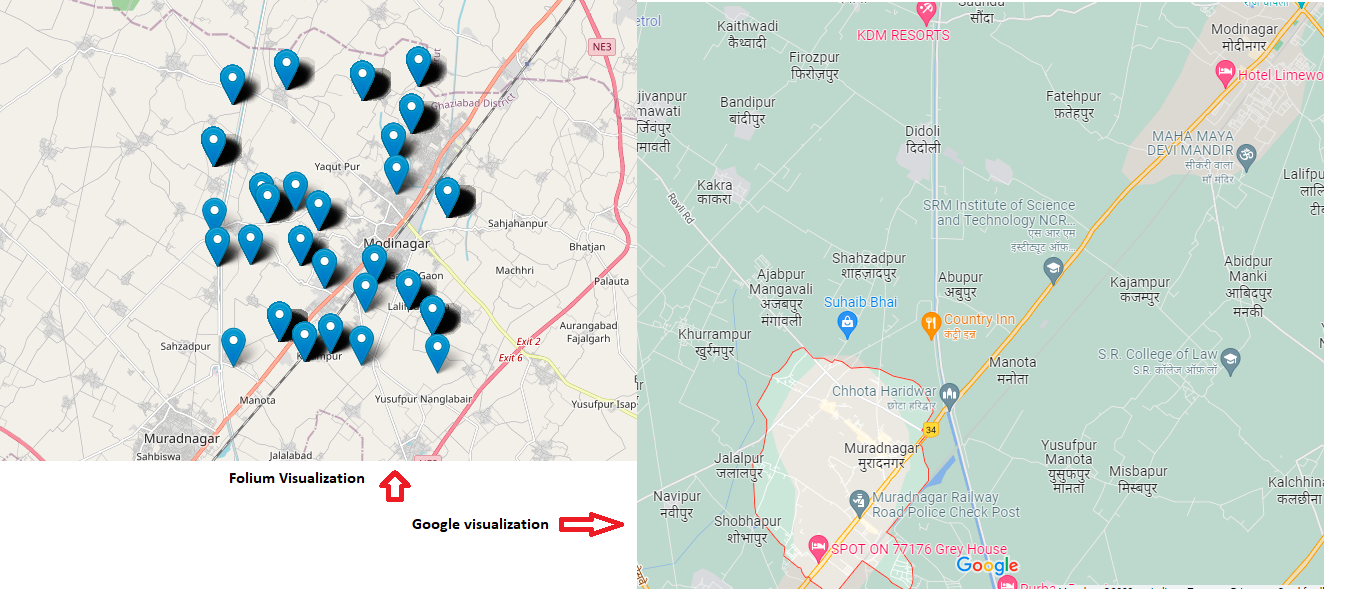

In [136]:
filtered_events_data_df['city'] = filtered_events_data_df['city'].replace(['Muradnagar'],'Modinagar')
print('Rows with Muradnagar: ' + str(filtered_events_data_df[filtered_events_data_df['city'] == 'Muradnagar'].shape[0]))
print('Rows with Modinagar: ' + str(filtered_events_data_df[filtered_events_data_df['city'] == 'Modinagar'].shape[0]))

Rows with Muradnagar: 0
Rows with Modinagar: 695


In [138]:
# TamilNadu has 4,36,329 rows, hence will split the dataset by cities. 
# However chennai has 3,66,875 rows itself which we need to split further by rows and generate multiple maps for Chennai
tn_cities_df = filtered_events_data_df[filtered_events_data_df['state']=='TamilNadu']
tn_citiesList = tn_cities_df['city'].unique()
tn_cityCount = tn_cities_df['city'].value_counts().to_dict()

'Chennai': 366875, 'Mayiladuthurai': 1847, 'Salem': 1845, 'Gudiyattam': 1543, 'Udagamandalam': 1541,
 'Kumbakonam': 1488, 'Mettur': 1403, 'Dharapuram': 1333, 'Idappadi': 1240, 'Kuniyamuthur': 1203,
 'Avaniapuram': 1156, 'Punamalli': 1101, 'Paramakkudi': 1092, 'Aruppukkottai': 1086,
 'Arakonam': 1086, 'Vaniyambadi': 1075, 'Pollachi': 1055, 'Kavundampalaiyam': 1051, 'Koyampattur': 1045,
 'Thuthukkudi': 1024, 'Hosur': 1015, 'Rajapalaiyam': 1009, 'Sankarankoil': 1009, 'Pammal': 999,
 'Neyveli': 996, 'Thanjavur': 978, 'Virudunagar': 962, 'Valparai': 959, 'Madhavaram': 954,
 'Thiruthangal': 945, 'Tindivanam': 940, 'Pudukkottai': 931, 'Alandur': 895, 'Gopichettipalaiyam': 895,
 'Tiruvottiyur': 882, 'Avadi': 862, 'Tambaram': 844, 'Chengalpattu': 837, 'Kurichi': 835,
 'Dindigul': 833, 'Tiruppur': 831, 'Nagercoil': 823, 'Kadayanallur': 815, 'Virudhachalam': 815,
 'Tiruchengode': 798, 'Nagapattinam': 796, 'Thiruvarur': 789, 'Gudalur': 789, 'Arani': 770,
 'Velluru': 766, 'Tiruchchirappalli': 766, 'Pattukkottai': 742, 'Sivakasi': 735,
 'Mannargudi': 726, 'Pallavaram': 719, 'Viluppuram': 707, 'Pannuratti': 697, 'Ambur': 667,
 'Ambattur': 643, 'Tenkasi': 623, 'Tiruvannamalai': 620, 'Nerkunram': 608, 'Tirunelveli': 606,
 'Kanchipuram': 602, 'Srivilliputtur': 599, 'Krishnagiri': 597, 'Dharmapuri': 590, 'Kambam': 573,
 'Ramanathapuram': 551, 'Karur': 547, 'Madurai': 541, 'Udumalaipettai': 534, 'Bodinayakkanur': 518,
 'Kumarapalaiyam': 518, 'Puliyankudi': 474, 'Tirupathur': 454, 'Virappanchatram': 444,
 'Mettupalayam': 441, 'TheniAllinagaram': 441, 'Namakkal': 439, 'Erode': 383, 'Attur': 305, 'Kovilpatti': 258}

In [140]:
if(runFoliumAnalysis):
    for city in tn_citiesList:
        if city != 'Chennai':
            df = tn_cities_df[tn_cities_df['city'] == city][["latitude", "longitude", "city"]] 
            count = tn_cityCount[city]
            saveMap(df,"tn_" + city + "_" + str(count) + ".html")

Dharapuram - 1333, Dharmapuri - 590, Dindigul - 833, Erode - 383, Gopichettipalaiyam - 895, Gudalur - 789, Gudiyattam - 1543, Hosur - 1015, Kadayanallur - 815, Kanchipuram - 602, Karur - 547, Kovilpatti - 258, Koyampattur - 1045, Krishnagiri - 597, Kumarapalaiyam - 518, Kumbakonam - 1488, Kuniyamuthur - 1203, Kurichi - 835, Madhavaram - 954, Madurai - 541, Mannargudi - 726, Mayiladuthurai - 1847, Mettupalayam - 441, Mettur - 1403, Nagapattinam - 796, Nagercoil - 823, Namakkal - 439, Nerkunram - 608, Neyveli - 996, Pallavaram - 719, Pammal - 999, Pannuratti - 697, Paramakkudi - 1092, Pattukkottai - 742, Pollachi - 1055, Pudukkottai - 931, Puliyankudi - 474, Punamalli - 1101, Rajapalaiyam - 1009, Ramanathapuram - 551, Salem - 1845, Sankarankoil - 1009, Sivakasi - 735, Srivilliputtur - 599, Tambaram - 844, Tenkasi - 623, Thanjavur - 978, TheniAllinagaram - 441, Thiruthangal - 945, Thiruvarur - 789, Tindivanam - 940, Tiruchchirappalli - 766, Tiruchengode - 798, Tirunelveli - 606, Tirupathur - 454, Tiruppur - 831, Tiruvannamalai - 620, Tiruvottiyur - 882, Udagamandalam - 1541, Udumalaipettai - 534, Valparai - 959, Vaniyambadi - 1075, Velluru - 766, Viluppuram - 707, Virappanchatram - 444, Virappanchatram - 444, Virudhachalam - 815, Virudunagar - 962
#### Typo Names
1. Idappadi - 1240, Should be Edappadi
2. Kambam - 573, Should be Cumbum
3. Kavundampalaiyam - 1051, Should be Kavundampalayam
4. Thuthukkudi - 1024. Should be Thoothukudi

#### Correcting Typos in TamilNadu city names

In [142]:
#Correcting typos
filtered_events_data_df['city'] = filtered_events_data_df['city'].replace(['Idappadi'],'Edappadi')
filtered_events_data_df['city'] = filtered_events_data_df['city'].replace(['Kambam'],'Cumbum')
filtered_events_data_df['city'] = filtered_events_data_df['city'].replace(['Kavundampalaiyam'],'Kavundampalayam')
filtered_events_data_df['city'] = filtered_events_data_df['city'].replace(['Thuthukkudi'],'Thoothukudi')

In [143]:
#Rechecking after replace
print('Rows with Idappadi: ' + str(filtered_events_data_df[filtered_events_data_df['city'] == 'Idappadi'].shape[0]))
print('Rows with Kambam: ' + str(filtered_events_data_df[filtered_events_data_df['city'] == 'Kambam'].shape[0]))
print('Rows with Kavundampalaiyam: ' + str(filtered_events_data_df[filtered_events_data_df['city'] == 'Kavundampalaiyam'].shape[0]))
print('Rows with Thuthukkudi: ' + str(filtered_events_data_df[filtered_events_data_df['city'] == 'Thuthukkudi'].shape[0]))

Rows with Idappadi: 0
Rows with Kambam: 0
Rows with Kavundampalaiyam: 0
Rows with Thuthukkudi: 0


In [144]:
# Chennai has 3,66,875 rows which we will split further by 5000 rows and generate multiple maps for Chennai
chennai_df = filtered_events_data_df[filtered_events_data_df['city']=='Chennai'][["latitude", "longitude", "city"]]
if(runFoliumAnalysis):
    for k,g in chennai_df.groupby(np.arange(len(chennai_df))//5000):
          saveMap(g,"tn_chennai_" + str(k) + ".html")

In [145]:
#Checking for unique latitude and longitude combination for Chennai
print(np.unique(chennai_df['latitude'].round(decimals=1)))
print(np.unique(chennai_df['longitude'].round(decimals=1)))

[13.1 13.2 25.2 34.6 41.9]
[12.6 55.3 69.2 80.3 80.4]


In [146]:
#Found 3 entries each for 3 lat/long combination which are very different from the rest
34.55530,69.20750 / 41.87190,12.56740 / 25.20480,55.27080
chennai_df[chennai_df['latitude'] > 25]

,latitude,longitude,city
22269,34.55530,69.20750,Chennai
91260,41.87190,12.56740,Chennai
245718,41.87190,12.56740,Chennai
291818,41.87190,12.56740,Chennai
533423,25.20480,55.27080,Chennai
1080564,34.55530,69.20750,Chennai
2393743,25.20480,55.27080,Chennai
2575568,34.55530,69.20750,Chennai
2847570,25.20480,55.27080,Chennai


In [147]:
# Either use link https://www.latlong.net/Show-Latitude-Longitude.html to decode the english name or copy paste the city in google
# Kabul, Afghanistan. 
findPlace("34.55530,69.20750")

City: کابل ,state: ولایت كابل ,country: افغانستان


In [148]:
findPlace("41.87190,12.56740")

City: Roma ,state: Lazio ,country: Italia


In [149]:
# Dubai
findPlace("25.20480,55.27080")

City: دبي ,state: دبي ,country: الإمارات العربية المتحدة


In [150]:
#Finding unique deviceid for rows which have kabul location
filtered_events_data_df[filtered_events_data_df['latitude']== 34.5553]['device_id'].unique()

array([7.75807484e+18])

In [151]:
print(filtered_events_data_df[filtered_events_data_df['device_id']== 7758074839281444864.00000]['latitude'].unique())
print(filtered_events_data_df[filtered_events_data_df['device_id']== 7758074839281444864.00000]['longitude'].unique())

[13.128677 34.5553  ]
[80.347016 69.2075  ]


In [152]:
#Replacing latitude 34.5553 with 13.128677 and longitude  69.2075 with 80.347016
filtered_events_data_df['latitude'] = filtered_events_data_df['latitude'].replace(34.5553, 13.128677)
filtered_events_data_df['longitude'] = filtered_events_data_df['longitude'].replace(69.2075, 80.347016)

In [153]:
#Finding unique deviceid for rows which have Roma location
filtered_events_data_df[filtered_events_data_df['latitude']== 41.87190]['device_id']

91260    -170254198178616704.00000
245718   -170254198178616704.00000
291818   -170254198178616704.00000
Name: device_id, dtype: float64

In [154]:
print(filtered_events_data_df[filtered_events_data_df['device_id']== -170254198178616704.00000]['latitude'].unique())
print(filtered_events_data_df[filtered_events_data_df['device_id']== -170254198178616704.00000]['longitude'].unique())

[13.128897 41.8719  ]
[80.306106 12.5674  ]


In [155]:
#Replacing latitude 41.8719 with 13.128897 and longitude 12.5674 with 80.306106
filtered_events_data_df['latitude'] = filtered_events_data_df['latitude'].replace(41.8719, 13.128897)
filtered_events_data_df['longitude'] = filtered_events_data_df['longitude'].replace(12.5674, 80.306106)

In [156]:
#Finding unique deviceid for rows which have Dubai location
filtered_events_data_df[filtered_events_data_df['latitude']== 25.20480]['device_id']

533423    348551303690779904.00000
2393743   348551303690779904.00000
2847570   348551303690779904.00000
Name: device_id, dtype: float64

In [157]:
print(filtered_events_data_df[filtered_events_data_df['device_id']== 348551303690779904.00000]['latitude'].unique())
print(filtered_events_data_df[filtered_events_data_df['device_id']== 348551303690779904.00000]['longitude'].unique())

[13.172149 25.2048  ]
[80.351688 55.2708  ]


In [158]:
#Replacing latitude 25.2048 with 55.2708 and longitude 55.2708 with 80.351688
filtered_events_data_df['latitude'] = filtered_events_data_df['latitude'].replace(25.2048, 13.172149)
filtered_events_data_df['longitude'] = filtered_events_data_df['longitude'].replace(55.2708, 80.351688)

In [159]:
# Converting timestamp column to datetime
filtered_events_data_df["timestamp"] = filtered_events_data_df["timestamp"].astype('datetime64[ns]')

In [160]:
# Checking for Missing/Duplicated entries in resultant data set
print("Shape of resultant data set is", filtered_events_data_df.shape)
print("Total Missing values in resultant data set is", filtered_events_data_df.isna().sum().sum())
print("Duplicate rows in resultant data set is", filtered_events_data_df.iloc[:,:].duplicated().sum())

Shape of resultant data set is (533515, 7)
Total Missing values in resultant data set is 0
Duplicate rows in resultant data set is 0


In [163]:
##Output the cleaned events data set to a file
filtered_events_data_df.to_csv('Cleaned_events_data.csv')

### 6.7 Merging the 3 data sets

In [164]:
# Changing dtype for Device_id to float from int in gender_age_train and phone_brand_device_model datasets to enable merging to events_data
df_gender_age['device_id'] = df_gender_age['device_id'].astype('float')
df_phonebr_devicemod['device_id'] = df_phonebr_devicemod['device_id'].astype('float')

In [165]:
events_age_df = pd.merge(filtered_events_data_df, df_gender_age, on=["device_id"])
print("Shape of events_age_df: " + str(events_age_df.shape))
events_age_df.head()

Shape of events_age_df: (533515, 10)


,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group
0,448114,5731369272434022400.00000,2016-05-03 13:21:16,80.34361,13.15333,Chennai,TamilNadu,M,26,M23-26
1,2330011,5731369272434022400.00000,2016-05-05 12:44:32,80.34361,13.15333,Chennai,TamilNadu,M,26,M23-26
2,1895687,5731369272434022400.00000,2016-05-02 12:45:05,80.34361,13.15333,Chennai,TamilNadu,M,26,M23-26
3,619715,5731369272434022400.00000,2016-05-02 03:37:12,80.34361,13.15333,Chennai,TamilNadu,M,26,M23-26
4,936200,5731369272434022400.00000,2016-05-04 19:18:59,80.34361,13.15333,Chennai,TamilNadu,M,26,M23-26


In [166]:
events_age_phone_info_df = pd.merge(events_age_df, df_phonebr_devicemod, on=["device_id"])
print("Shape of events_age_phone_info_df: " + str(events_age_phone_info_df.shape))
print("Unique users in events_age_phone_info_df: " + str(events_age_phone_info_df['device_id'].nunique()))
events_age_phone_info_df.head()

Shape of events_age_phone_info_df: (533515, 12)
Unique users in events_age_phone_info_df: 9538


,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model
0,448114,5731369272434022400.00000,2016-05-03 13:21:16,80.34361,13.15333,Chennai,TamilNadu,M,26,M23-26,HTC,One max
1,2330011,5731369272434022400.00000,2016-05-05 12:44:32,80.34361,13.15333,Chennai,TamilNadu,M,26,M23-26,HTC,One max
2,1895687,5731369272434022400.00000,2016-05-02 12:45:05,80.34361,13.15333,Chennai,TamilNadu,M,26,M23-26,HTC,One max
3,619715,5731369272434022400.00000,2016-05-02 03:37:12,80.34361,13.15333,Chennai,TamilNadu,M,26,M23-26,HTC,One max
4,936200,5731369272434022400.00000,2016-05-04 19:18:59,80.34361,13.15333,Chennai,TamilNadu,M,26,M23-26,HTC,One max


### 6.8 Translating chinese to English names for Phone Brand

In [167]:
events_age_phone_info_df['phone_brand'].unique()

array(['HTC', '小米', '酷派', '魅族', '三星', 'vivo', '华为', '中国移动', '酷比', '天语',
       'LG', '欧博信', '乐视', '美图', 'OPPO', '德赛', '唯米', '努比亚', '海信', '台电',
       '朵唯', 'TCL', '联想 ', '一加', '诺基亚', '海尔', '百加', '酷比魔方', '果米', '优米',
       '聆韵', '华硕', 'LOGO', '诺亚信', '语信', '锤子', '奇酷', 'Lovme', '青橙', '纽曼',
       'ZUK', '富可视', '梦米', '米歌', '黑米', '优购', '摩托罗拉', '波导', '爱派尔', '艾优尼',
       '小杨树', '斐讯', '大Q', '尼比鲁', '康佳', '金星数码', '维图', '奥克斯', '易派', '贝尔丰',
       '欧奇', '智镁', '至尊宝', 'SUGAR', '糯米', '谷歌', '广信', '邦华', '摩乐', '米奇',
       '飞秒', '百立丰', '先锋', '唯比', '青葱', '惠普', '基伍', '神舟', '大可乐', '夏新', '长虹'],
      dtype=object)

In [168]:
# INSAID team has only provided limited mappings and hence need to find other mappings manually by googling
brands_chinese = ['HTC', '小米', '酷派', '魅族', '三星', 'vivo', '华为', '中国移动', '酷比', '天语',
                   'LG', '欧博信', '乐视', '美图', 'OPPO', '德赛', '唯米', '努比亚', '海信', '台电',
                   '朵唯', 'TCL', '联想 ', '一加', '诺基亚', '海尔', '百加', '酷比魔方', '果米', '优米',
                   '聆韵', '华硕', 'LOGO', '诺亚信', '语信', '锤子', '奇酷', 'Lovme', '青橙', '纽曼',
                   'ZUK', '富可视', '梦米', '米歌', '黑米', '优购', '摩托罗拉', '波导', '爱派尔', '艾优尼',
                   '小杨树', '斐讯', '大Q', '尼比鲁', '康佳', '金星数码', '维图', '奥克斯', '易派', '贝尔丰',
                   '欧奇', '智镁', '至尊宝', 'SUGAR', '糯米', '谷歌', '广信', '邦华', '摩乐', '米奇',
                   '飞秒', '百立丰', '先锋', '唯比', '青葱', '惠普', '基伍', '神舟', '大可乐', '夏新', '长虹']
brands_english = ['HTC', 'Xiaomi', 'Cool', 'Meizu', 'Samsung', 'vivo', 'Huawei', 'China Mobile', 'Coolby', 'Tianyu',
                 'LG', 'Obson', 'LeTV', 'Meitu', 'OPPO', 'Desai', 'Wei Mi', 'Nubia', 'Hisense', 'Taipower',
                 'Duowei', 'TCL', 'Lenovo', 'One Plus', 'Nokia', 'Haier', 'Baiga', 'Rubiks Cube', 'Guomi', 'Umi',
                 'Listening Rhyme', 'ASUS', 'LOGO', 'Noah', 'Letter', 'Hammer', 'Qiku', 'Lovme', 'Green Orange', 'Newman',
                 'ZUK', 'Focus', 'Mengmi', 'Mige', 'Black Rice', 'Yougo', 'Motorola', 'Wave', 'Aipal ', 'Ai Youni', 
                 'Little Poplar', 'Fixuns', 'Big Q', 'Nibiru', 'Konka', 'Venus Digital', 'Weitu', 'Aux', 'Epai', 'Belfong',
                 'Ouqi', 'Chi Magnesium', 'Supreme Treasure', 'SUGAR', 'Glutinous Rice', 'Google', 'Guangxin', 'Banghua', 'Mole', 'Mickey',
                 'Femtosecond', 'Baifeng', 'Pioneer', 'Vibe', 'Green Onion', 'HP', 'Kivu', 'Shenzhou', 'Big Cola', 'Xia Xin','Changhong']
brandNameDict = dict(zip(brands_chinese,brands_english))

In [173]:
events_age_phone_info_df=events_age_phone_info_df.replace({"phone_brand": brandNameDict})

In [174]:
#Rechecking if values have been replaced properly
events_age_phone_info_df['phone_brand'].unique()

array(['HTC', 'Xiaomi', 'Cool', 'Meizu', 'Samsung', 'vivo', 'Huawei',
       'China Mobile', 'Coolby', 'Tianyu', 'LG', 'Obson', 'LeTV', 'Meitu',
       'OPPO', 'Desai', 'Wei Mi', 'Nubia', 'Hisense', 'Taipower',
       'Duowei', 'TCL', 'Lenovo', 'One Plus', 'Nokia', 'Haier', 'Baiga',
       'Rubiks Cube', 'Guomi', 'Umi', 'Listening Rhyme', 'ASUS', 'LOGO',
       'Noah', 'Letter', 'Hammer', 'Qiku', 'Lovme', 'Green Orange',
       'Newman', 'ZUK', 'Focus', 'Mengmi', 'Mige', 'Black Rice', 'Yougo',
       'Motorola', 'Wave', 'Aipal ', 'Ai Youni', 'Little Poplar',
       'Fixuns', 'Big Q', 'Nibiru', 'Konka', 'Venus Digital', 'Weitu',
       'Aux', 'Epai', 'Belfong', 'Ouqi', 'Chi Magnesium',
       'Supreme Treasure', 'SUGAR', 'Glutinous Rice', 'Google',
       'Guangxin', 'Banghua', 'Mole', 'Mickey', 'Femtosecond', 'Baifeng',
       'Pioneer', 'Vibe', 'Green Onion', 'HP', 'Kivu', 'Shenzhou',
       'Big Cola', 'Xia Xin', 'Changhong'], dtype=object)

In [175]:
#Save the final merged dataset
events_age_phone_info_df.to_csv('events_age_phone_info_df.csv', encoding='utf-8', index=False)

In [176]:
#As there will be many events per device, many rows are unecessary for most part of our EDA except when we have to check for distribution of calls
events_age_phone_info_df.duplicated(subset='device_id', keep='first').sum()

523977

In [178]:
#Creating new DF with only unique deviceid and saving it
events_age_phone_info_unique_df = events_age_phone_info_df.drop_duplicates(subset='device_id', keep='first', inplace=False, ignore_index=False)
events_age_phone_info_df.to_csv('events_age_phone_info_unique_df.csv', encoding='utf-8')

### 6.9 Checking for Outliers in Age

In [179]:
events_age_phone_info_unique_df.describe()

,event_id,device_id,longitude,latitude,age
count,9538.00000,9538.00000,9538.00000,9538.00000,9538.00000
mean,1794338.42504,-21636918442690884.00000,79.74139,18.27296,31.18222
std,916831.41737,5327634425138654208.00000,2.01674,7.57012,9.98381
min,307.00000,-9221086586254645248.00000,76.70098,8.19011,6.00000
25%,1026205.25000,-4637371902407510016.00000,78.25411,13.04652,24.00000
50%,1904802.50000,-55293773324845976.00000,80.18557,13.16202,29.00000
75%,2568711.25000,4576341905587527680.00000,80.34260,27.09445,35.00000
max,3252723.00000,9221843411551060992.00000,94.03646,30.84714,89.00000


<AxesSubplot:>

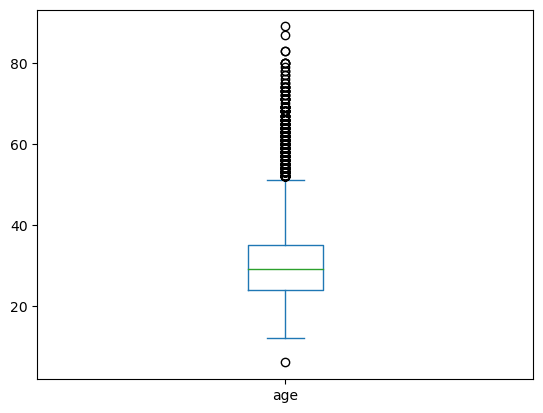

In [180]:
# We find from the box plot that there are some outliers
events_age_phone_info_unique_df['age'].plot(kind='box')

In [182]:
#Finding the upper and lower range of outliers
Q1 = np.percentile(events_age_phone_info_unique_df['age'], 25, interpolation = 'midpoint')
Q3 = np.percentile(events_age_phone_info_unique_df['age'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print('Upper bound: ',Q3+1.5*IQR )  
print('Lower bound: ',Q1-1.5*IQR )  

Upper bound:  51.5
Lower bound:  7.5


In [183]:
#There are 3 groups to which these outliers belong to - F43+ , M22- and M39+
events_age_phone_info_unique_df[(events_age_phone_info_unique_df['age'] > 51.5) | (events_age_phone_info_unique_df['age'] < 7.5)].groupby('group')['age'].value_counts()

group  age
F43+   54     33
       53     26
       60     17
       52     16
       63     16
       61     15
       62     14
       57     12
       56     11
       55     10
       59     10
       65      9
       64      7
       58      6
       66      6
       71      6
       68      4
       67      3
       69      3
       74      3
       72      2
       80      2
       73      1
       75      1
       76      1
       77      1
       78      1
       79      1
       83      1
       89      1
M22-   6       1
M39+   53     30
       54     27
       52     18
       59     16
       61     16
       57     14
       60     14
       63     13
       56     11
       55     10
       58      8
       69      8
       62      7
       64      7
       68      7
       66      5
       73      5
       67      4
       65      3
       74      2
       80      2
       70      1
       71      1
       72      1
       75      1
       77      1
       78      1
   

In [197]:
#Function to create a more uniform age distribution
def categorise(row):  
    if row['age'] >= 0 and row['age'] <= 10:
        return '0-10'
    elif row['age'] > 10 and row['age'] <= 20:
        return '11-20'
    elif row['age'] > 20  and row['age'] <= 30:
        return '21-30'
    elif row['age'] > 30  and row['age'] <= 40:
        return '31-40'
    elif row['age'] > 40  and row['age'] <= 50:
        return '41-50'
    return '50+'

In [198]:
events_age_phone_info_unique_df['Custom_Age_Group'] = events_age_phone_info_unique_df.apply(lambda row: categorise(row), axis=1)

<a name = Section7></a>

---
# **7. Data Post-Profiling**
---

- In this section, we will observe the changes after performing data pre-processing, if present.

In [203]:
profile = ProfileReport(df=events_age_phone_info_df)
profile.to_file(output_file = 'PostProfilingReport_mergeddataset.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [204]:
events_age_phone_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533515 entries, 0 to 533514
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   event_id      533515 non-null  int64         
 1   device_id     533515 non-null  float64       
 2   timestamp     533515 non-null  datetime64[ns]
 3   longitude     533515 non-null  float64       
 4   latitude      533515 non-null  float64       
 5   city          533515 non-null  object        
 6   state         533515 non-null  object        
 7   gender        533515 non-null  object        
 8   age           533515 non-null  int64         
 9   group         533515 non-null  object        
 10  phone_brand   533515 non-null  object        
 11  device_model  533515 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 69.0+ MB


In [205]:
# Checking for missing values
events_age_phone_info_df.isna().sum()

event_id        0
device_id       0
timestamp       0
longitude       0
latitude        0
city            0
state           0
gender          0
age             0
group           0
phone_brand     0
device_model    0
dtype: int64

In [206]:
events_age_phone_info_df.describe()

,event_id,device_id,longitude,latitude,age
count,533515.00000,533515.00000,533515.00000,533515.00000,533515.00000
mean,1630045.08864,367427462633640128.00000,80.05587,15.50828,31.32174
std,938667.31838,5331287727562939392.00000,1.39184,5.72773,9.36902
min,2.00000,-9221086586254645248.00000,76.70098,8.19011,6.00000
25%,816999.00000,-4516402734523121152.00000,80.28226,13.11864,25.00000
50%,1633291.00000,423511127625098240.00000,80.31319,13.14558,30.00000
75%,2442668.50000,5536513450525271040.00000,80.35169,13.17958,35.00000
max,3252950.00000,9221843411551060992.00000,94.03646,30.84714,89.00000


In [207]:
#Unique users (device_id) data
events_age_phone_info_unique_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9538 entries, 0 to 533514
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   event_id          9538 non-null   int64         
 1   device_id         9538 non-null   float64       
 2   timestamp         9538 non-null   datetime64[ns]
 3   longitude         9538 non-null   float64       
 4   latitude          9538 non-null   float64       
 5   city              9538 non-null   object        
 6   state             9538 non-null   object        
 7   gender            9538 non-null   object        
 8   age               9538 non-null   int64         
 9   group             9538 non-null   object        
 10  phone_brand       9538 non-null   object        
 11  device_model      9538 non-null   object        
 12  Custom_Age_Group  9538 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


**Observations**:

- There are **no missing values** and **no duplicate values** in the filtered dataset consisting of 6 states.

- Filtering results in only 16.4% of the data. i.e. 5,33,515 out of original 32,52,950 rows.

- The **timestamp** feature is a **datetime64** type

- There are **9538** unique users

<a name = Section8></a>

---
# **8. Exploratory Data Analysis**

In [312]:
#Functions to plot graphs
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16}
def plot(axes, title, legend=None, displayBarLabel = None):   
    axes.set_facecolor("gainsboro")
    axes.set_xlabel(axes.get_xlabel(), fontdict=font)
    axes.set_ylabel(axes.get_ylabel(), fontdict=font)
    # To show the count on top of bar
    if(displayBarLabel == None):
        for i in axes.containers:
            axes.bar_label(i,size=16)
    plt.title(title, fontdict=font)
    plt.xticks(rotation=45)
    axes.xaxis.set_tick_params(labelsize=15)
    axes.yaxis.set_tick_params(labelsize=15)
    if(legend != None):
        plt.legend(loc='upper right', title = legend)
    plt.tight_layout()
    
    plt.show()
    
def horizontalBarplot(df,firstDimension,SecondDimension,horizontalLabel,title,displayBarLabel = None):
    sns.set(rc={'figure.figsize':(12,6)})
    ax = sns.barplot(x=horizontalLabel,
            y=firstDimension,
            hue=SecondDimension,
            palette="deep",
            data=df.groupby([firstDimension, SecondDimension]).size().to_frame(horizontalLabel).reset_index())
    ax.set_xlabel(ax.get_xlabel(), fontdict=font)
    ax.set_ylabel(ax.get_ylabel(), fontdict=font)
    if(displayBarLabel == None):
        for i in ax.containers:
            ax.bar_label(i,)
    plt.title(title, fontdict=font)
    plt.show()

### 1. Distribution of Users(device_id) across States

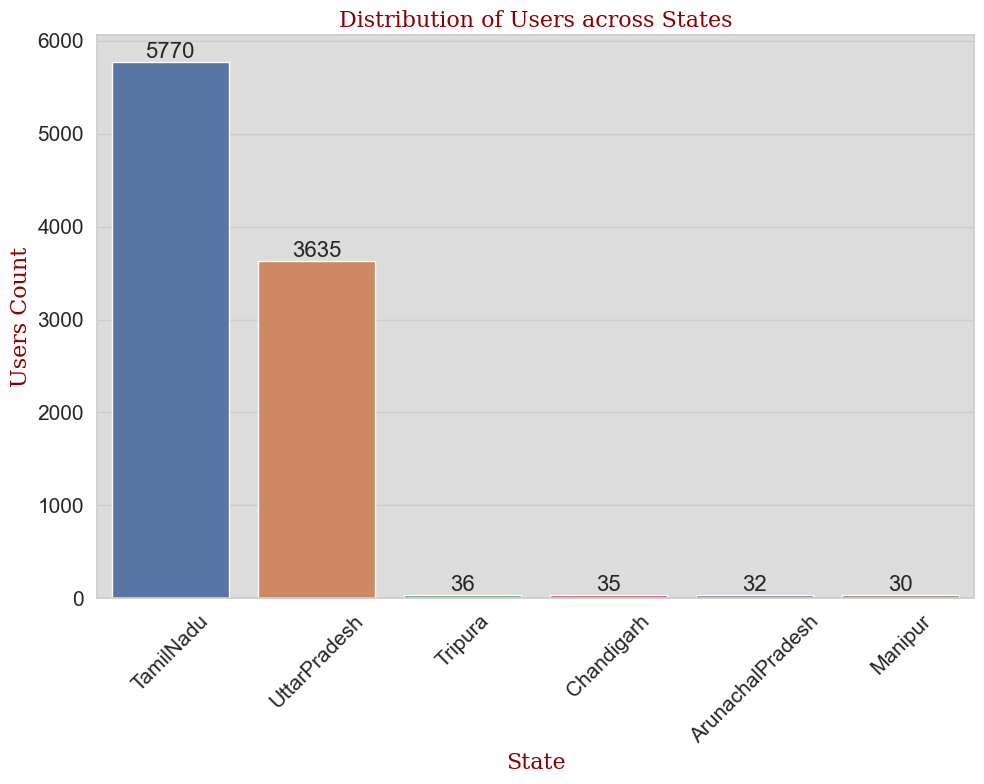

In [311]:
states_uniquedevice_df = events_age_phone_info_df.groupby('state').device_id.nunique().reset_index()
states_uniquedevice_df.sort_values('device_id', ascending = False,  inplace=True)
states_uniquedevice_df.columns = ['State', 'Users Count']
fig = plt.figure(figsize = [10,8])
ax = sns.barplot(x = 'State', y = 'Users Count', data = states_uniquedevice_df)

plot(ax, "Distribution of Users across States")

**Tamil Nadu** has majority of unique users at **60.5%** followed by **Uttar Pradesh** at **38%** and 3 other states and 1 UT are in the minority with **less than 2%** share.

### 2. Distribution of Users across Top 10 Phone Brands

In [211]:
# Top 10 Phone brands
top_10_PhoneBrands = events_age_phone_info_unique_df.groupby(['phone_brand'])['device_id'].nunique().sort_values(ascending=False)[:10]
top_10_PhoneBrandsList = top_10_PhoneBrands.index.tolist()
top_10_PhoneBrands

phone_brand
Xiaomi     2405
Samsung    2133
Huawei     1502
vivo        881
OPPO        686
Meizu       589
Cool        473
HTC         148
Lenovo      111
LeTV         84
Name: device_id, dtype: int64

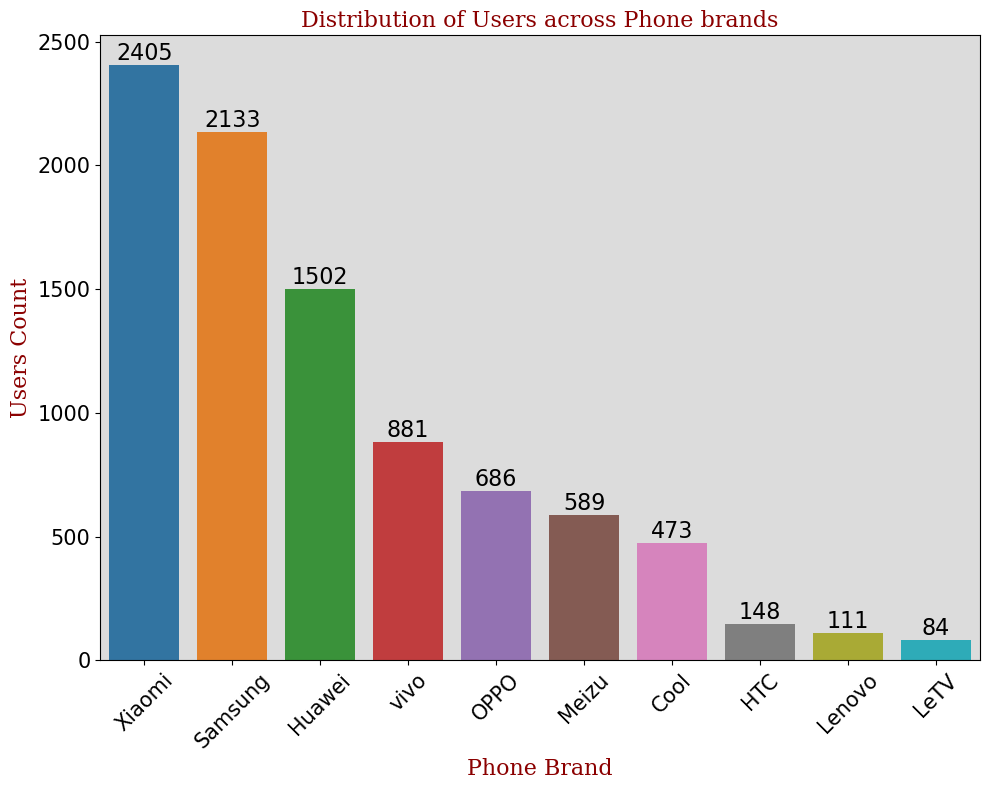

In [212]:
top10_phonebrands_df = events_age_phone_info_unique_df[events_age_phone_info_unique_df['phone_brand'].isin(top_10_PhoneBrandsList)]
phonebrands_uniquedevice_df = top10_phonebrands_df.groupby('phone_brand').device_id.nunique().reset_index()
phonebrands_uniquedevice_df.sort_values('device_id', ascending = False,  inplace=True)
phonebrands_uniquedevice_df.columns = ['Phone Brand', 'Users Count']
fig = plt.figure(figsize = [10,8])
ax = sns.barplot(x = 'Phone Brand', y = 'Users Count', data = phonebrands_uniquedevice_df)
plot(ax, 'Distribution of Users across Phone brands')

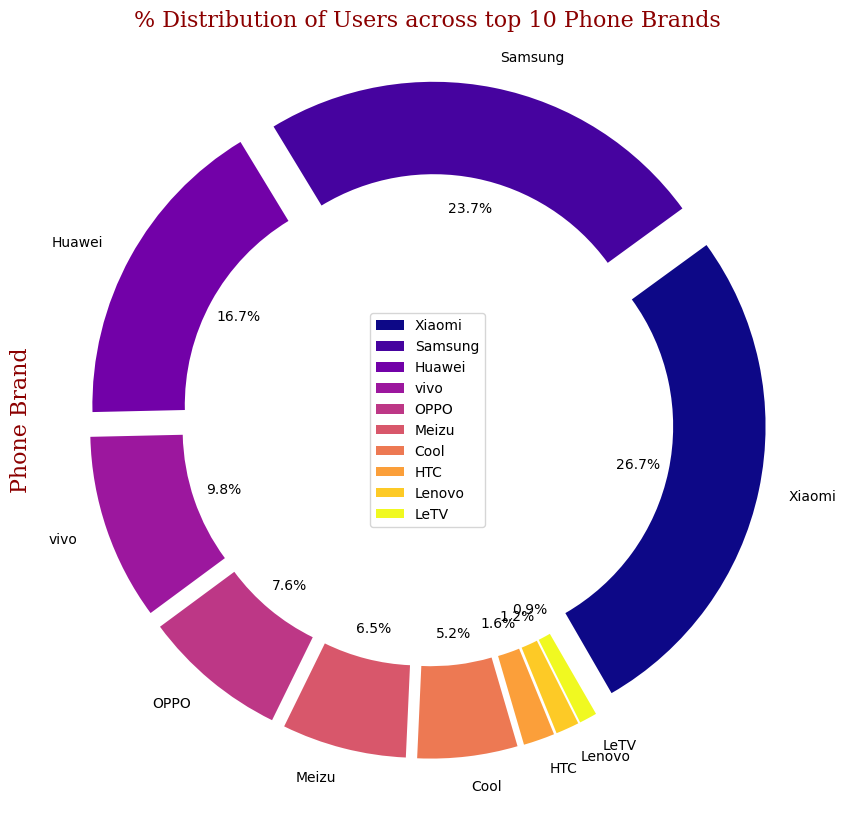

In [213]:
top_10_PhoneBrands.plot(kind = 'pie',figsize = [10,10],explode = np.ones(10)/10 ,wedgeprops={'width':0.30}, autopct= '%3.1f%%',legend=True,
                                                                       cmap='plasma',startangle=300)
plt.ylabel("Phone Brand",fontdict= font)
plt.title("% Distribution of Users across top 10 Phone Brands",fontdict= font)
plt.show()

**Xiaomi** is the leader with  **26.7%** market share closely followed by **Samsung** at **23.7%** and **Huawei** at **16.7%**. **Top 5** brands alone capture **84.4%** of the overall market.

### 3. Distribution of Users across Gender

In [214]:
events_age_phone_info_unique_df['gender'].value_counts()

M    5976
F    3562
Name: gender, dtype: int64

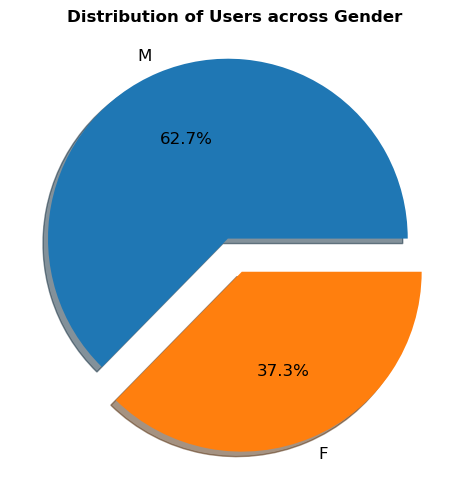

In [215]:
fig, axes = plt.subplots(1,1)

pie_chart = events_age_phone_info_unique_df['gender'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, label='',textprops = {'fontsize':12})
pie_chart.set_title("Distribution of Users across Gender",fontweight="bold")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()


**Males** dominate the customer base of Insaid with **62.7%** share when compared to **Females at 37.3%**.

### 4. Distribution of Users across Age Segments.

In [216]:
# Age distribution in custom specific intervals
events_age_phone_info_unique_df.groupby('gender').age.value_counts(bins=[10,20,30,40,50,60,100])

gender  age          
F       (20.0, 30.0]     1809
        (30.0, 40.0]      875
        (40.0, 50.0]      377
        (9.999, 20.0]     236
        (50.0, 60.0]      167
        (60.0, 100.0]      98
M       (20.0, 30.0]     3034
        (30.0, 40.0]     1581
        (40.0, 50.0]      580
        (9.999, 20.0]     517
        (50.0, 60.0]      176
        (60.0, 100.0]      87
Name: age, dtype: int64

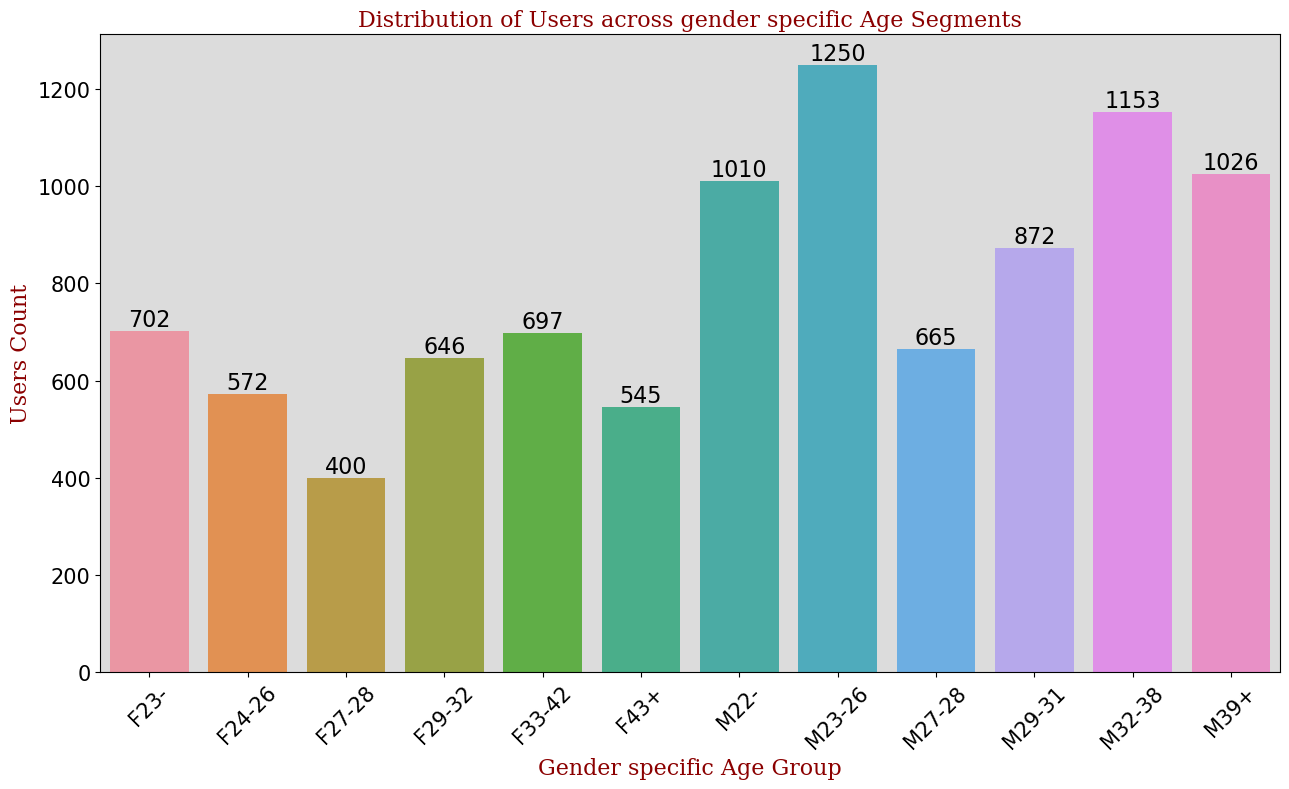

In [217]:
# Gender specific distribution of age segments
agegroup_uniquedevice_df = events_age_phone_info_df.groupby('group').device_id.nunique().reset_index()
agegroup_uniquedevice_df.columns = ['Gender specific Age Group', 'Users Count']
fig = plt.figure(figsize = [13,8])
ax = sns.barplot(x = 'Gender specific Age Group', y = 'Users Count', data = agegroup_uniquedevice_df)
plot(ax, 'Distribution of Users across gender specific Age Segments')

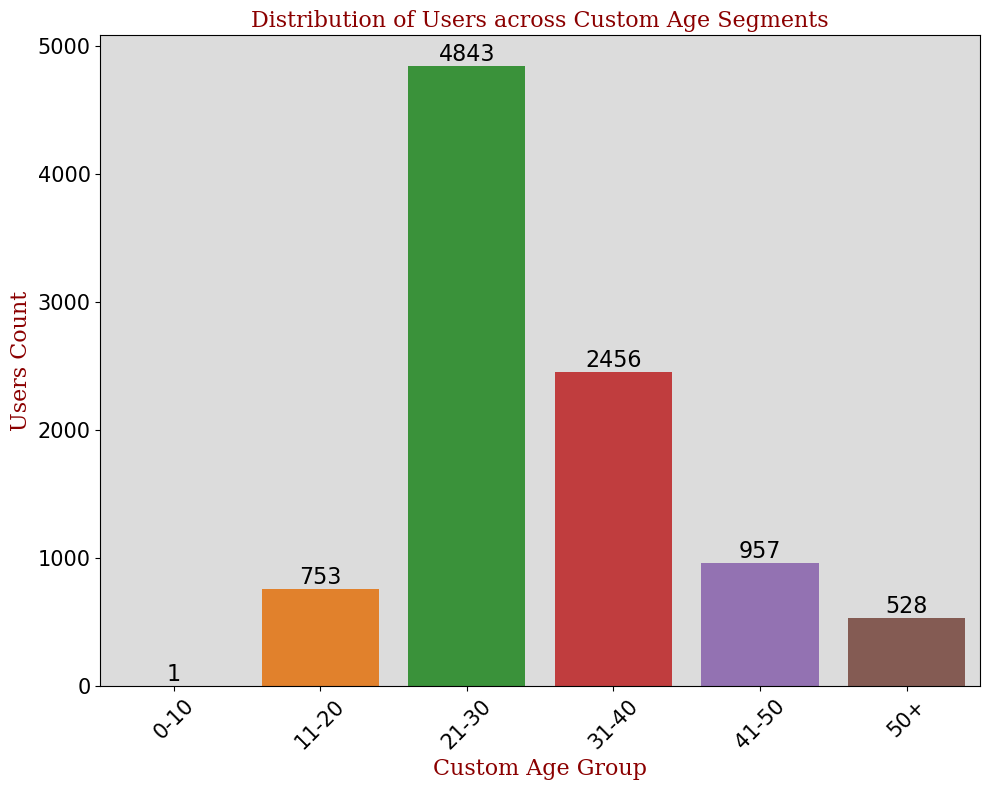

In [218]:
# Distribution of custom age segments irrespective of gender
customAgeGroup_uniquedevice_df = events_age_phone_info_unique_df.groupby('Custom_Age_Group').device_id.nunique().reset_index()
customAgeGroup_uniquedevice_df.columns = ['Custom Age Group', 'Users Count']
fig = plt.figure(figsize = [10,8])
ax = sns.barplot(x = 'Custom Age Group', y = 'Users Count', data = customAgeGroup_uniquedevice_df)
plot(ax, 'Distribution of Users across Custom Age Segments')

- In **Male** category, highest number of users (**1250**) are found in **23-26** age group whereas for **females** maximum users (**702**) are **below the age of 23** 
- **21-30** is the popular age group for both male and females contributing to **50.7%**. 

### 5.a Distribution of Phone Brands for each Age Segment

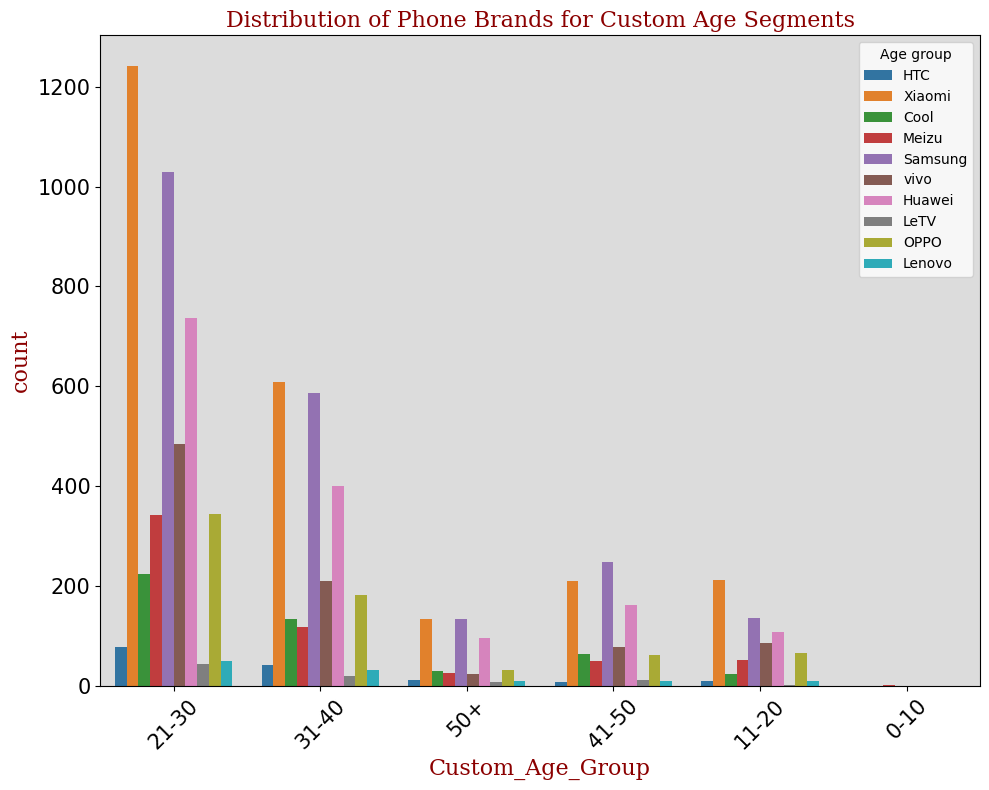

In [219]:
fig = plt.figure(figsize = [10,8])
ax = sns.countplot('Custom_Age_Group', hue='phone_brand', data=top10_phonebrands_df)
plot(axes = ax, title = 'Distribution of Phone Brands for Custom Age Segments', legend="Age group", displayBarLabel = "NO")

All age groups except **41-50** and **50+** prefer **Xiaomi** brand followed by **Samsung**. In **41-50** age group, **Samsung brand** is preferred

### 5.b Distribution of Top 10 Phone Brands for each State

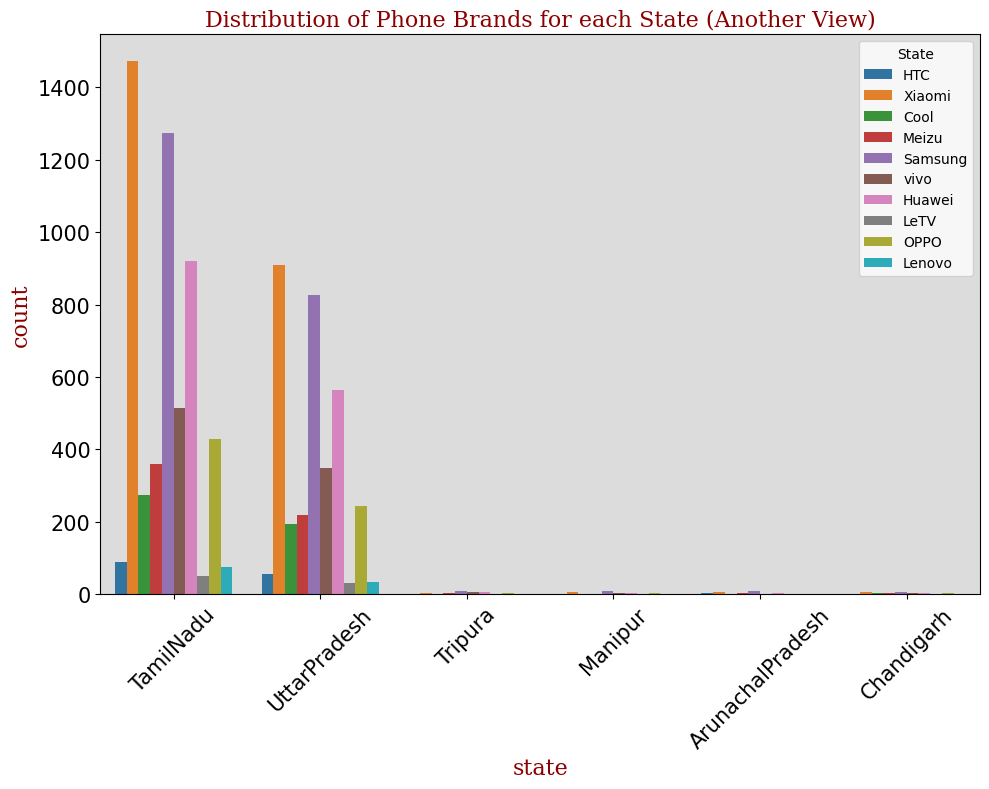

In [220]:
fig = plt.figure(figsize = [10,8])
ax = sns.countplot('state', hue='phone_brand', data=top10_phonebrands_df)
plot(axes = ax, title = 'Distribution of Phone Brands for each State (Another View)', legend="State", displayBarLabel = "NO")

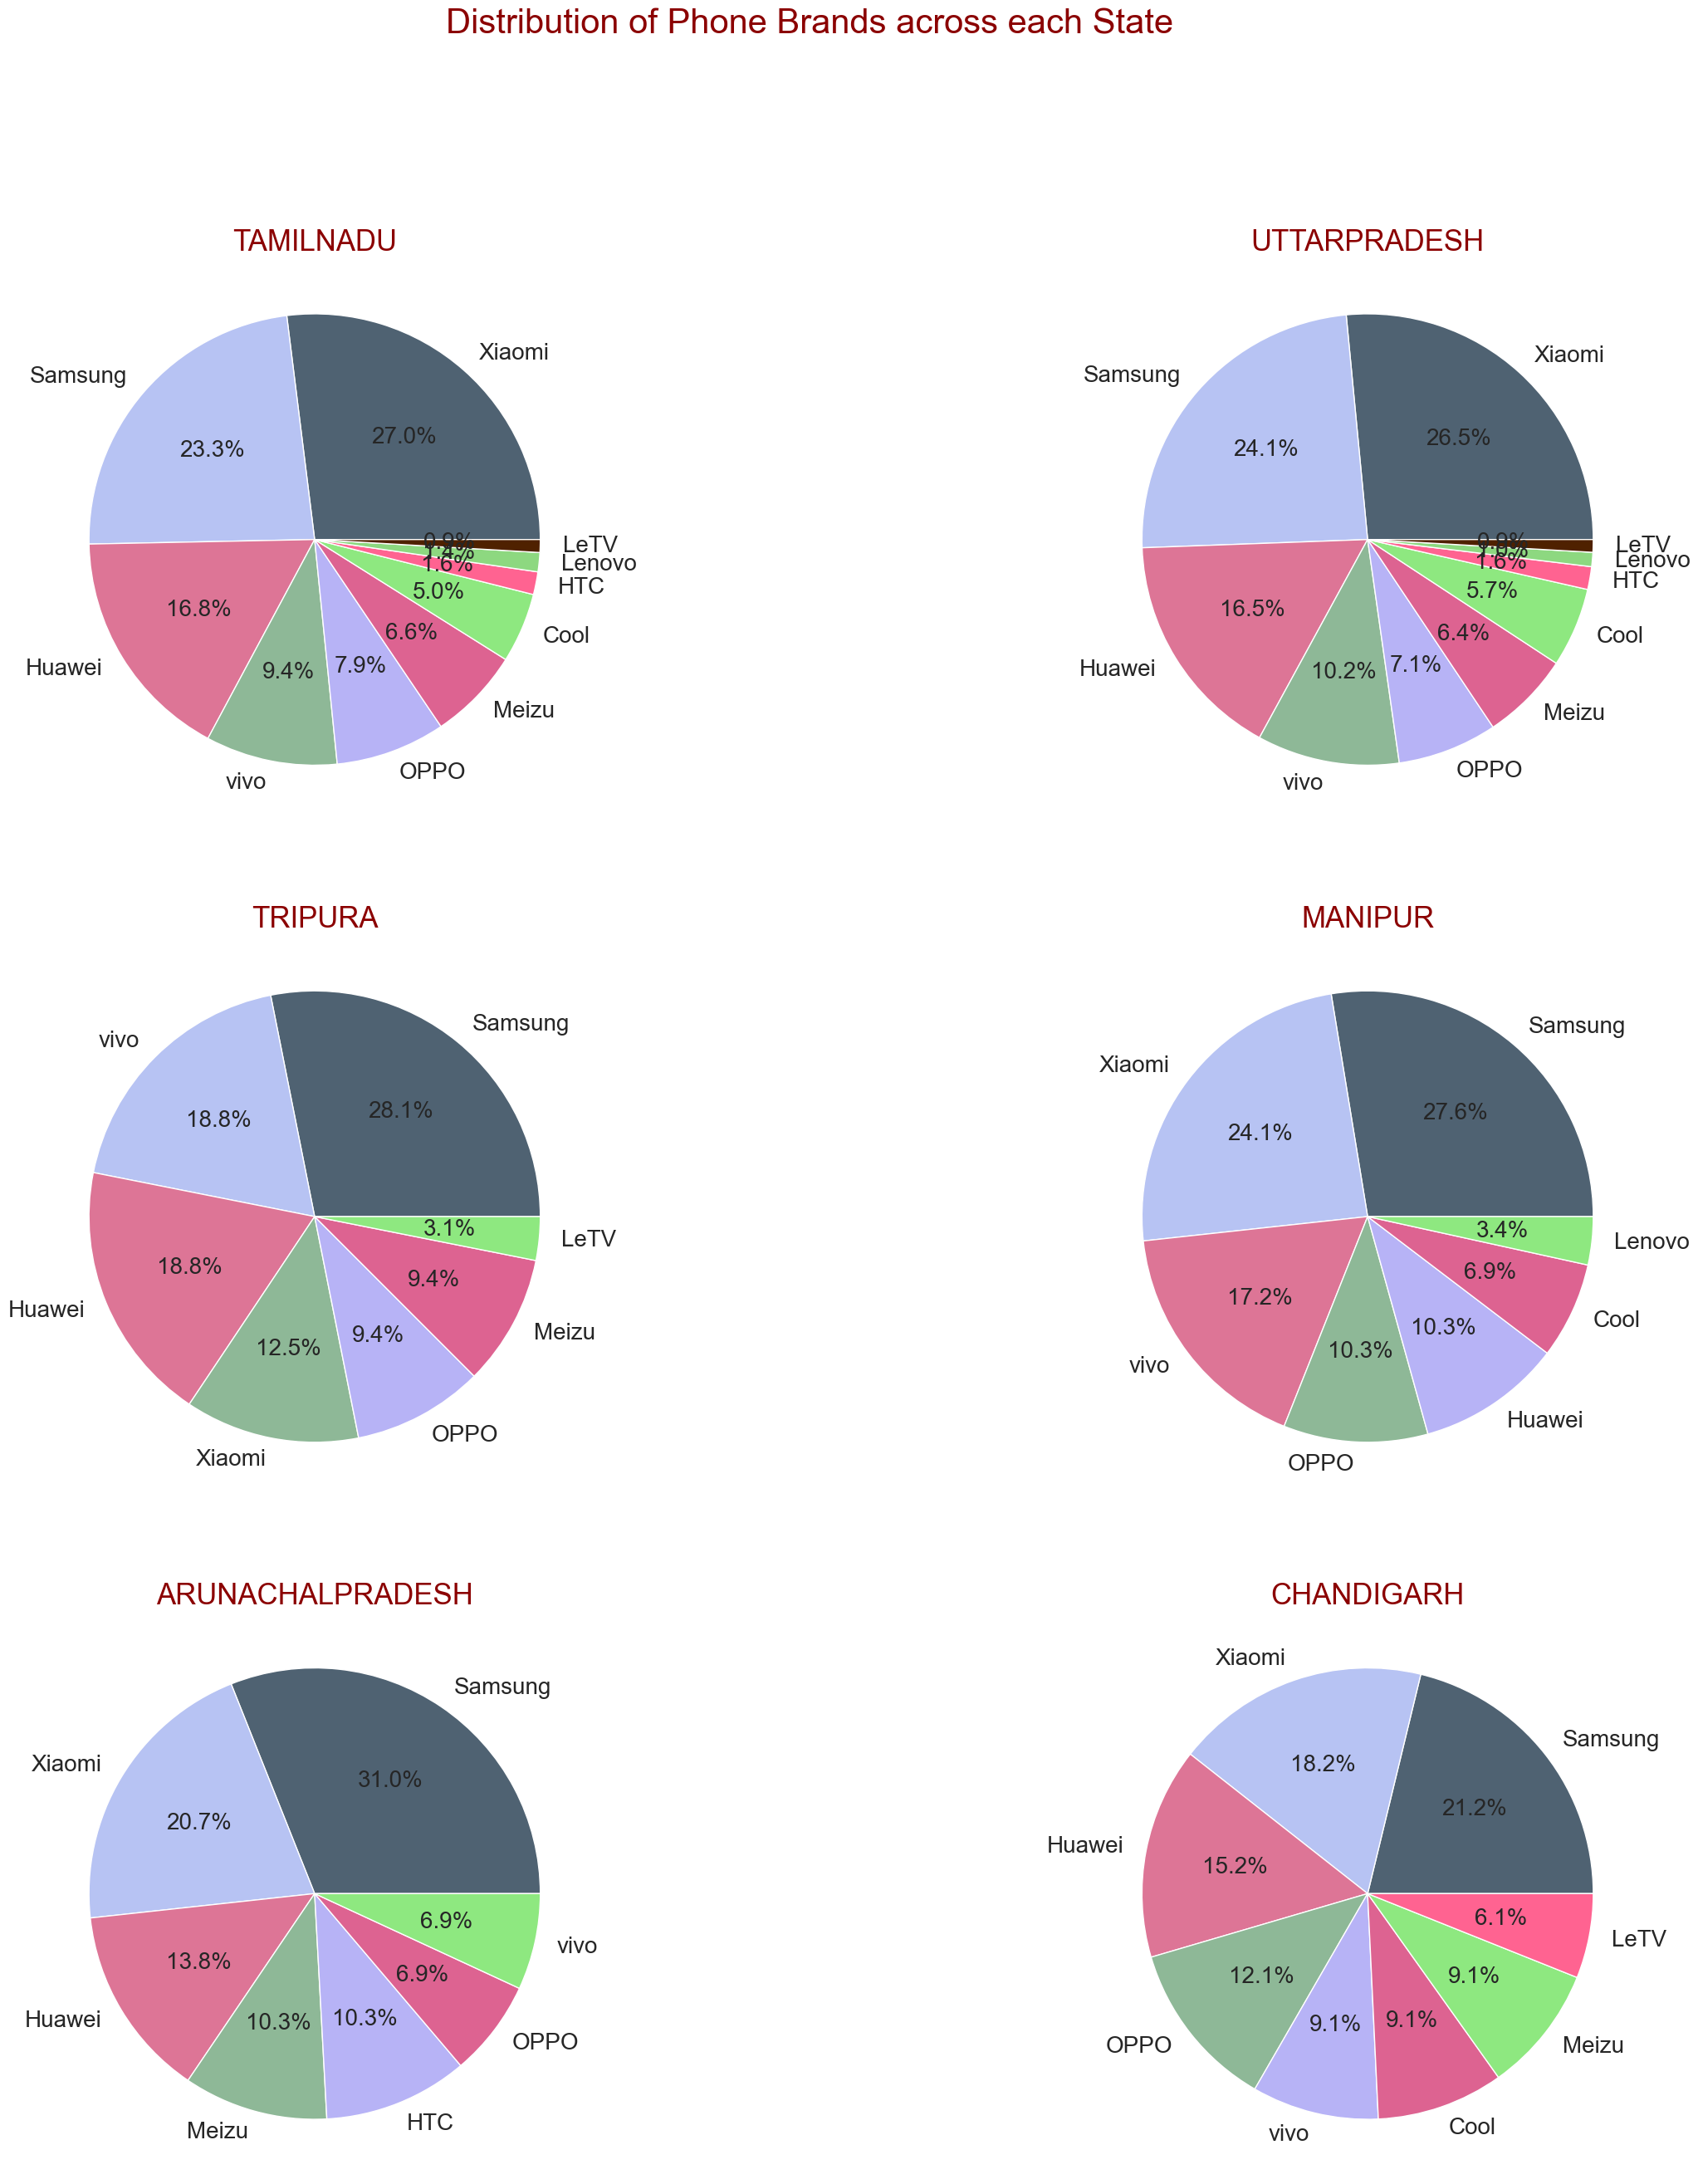

In [259]:
# Instantiate figure and axes object
fig = plt.figure(figsize=(30,30))
fig.suptitle("Distribution of Phone Brands across each State", fontsize=30, color='darkred',)
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#B7B3F6', '#DD6391', '#8EE880', '#FF6391', '#8DD880', '#4F2100']
# Initiate a list of states
states = list(top10_phonebrands_df['state'].unique())

# Plot chart for each state under consideration
for n, state in enumerate(states):
    ax = plt.subplot(3,2,n+1)
    # Finding frequency and ploting pie
    top10_phonebrands_df['phone_brand'][top10_phonebrands_df['state']==state].value_counts().sort_values(ascending= False).plot.pie(autopct='%1.1f%%',
    ax=ax,fontsize = 20, colors=colors)
    # Display the graph
    ax.set_title(state.upper(), size = 25, color='darkred')
    ax.set_ylabel("")
    ax.set_xlabel("", size = 24)

**Xiaomi** is the leading brand among both the populous states **Tamil Nadu** and **Uttar Pradesh** with **27%** and **26.5%** share whereas **Samsung** holds the **reins** when it comes to **smaller states/UT**.

### 5.c Distribution of Top 10 Phone Brands for each Gender

In [273]:
top10_phonebrands_df.groupby('gender').phone_brand.value_counts()

gender  phone_brand
F       Xiaomi          896
        Samsung         840
        Huawei          562
        vivo            359
        OPPO            271
        Meizu           189
        Cool            152
        HTC              41
        Lenovo           35
        LeTV             27
M       Xiaomi         1509
        Samsung        1293
        Huawei          940
        vivo            522
        OPPO            415
        Meizu           400
        Cool            321
        HTC             107
        Lenovo           76
        LeTV             57
Name: phone_brand, dtype: int64

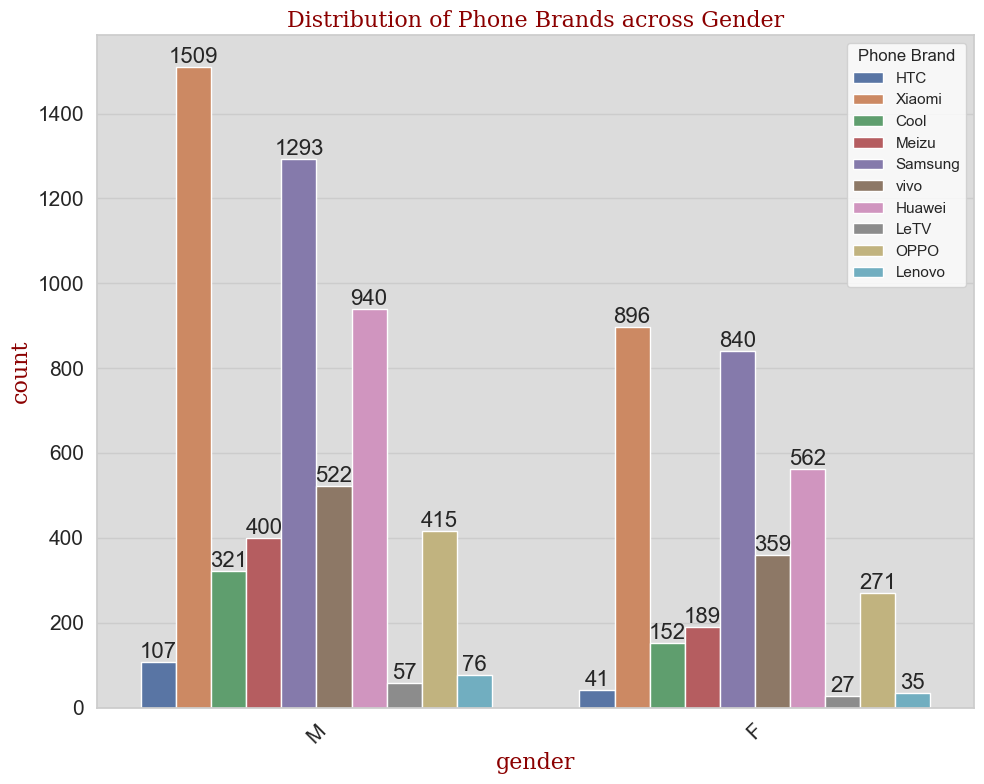

In [299]:
fig = plt.figure(figsize = [10,8])

ax = sns.countplot('gender', hue='phone_brand', data=top10_phonebrands_df)
sns.color_palette("pastel")

plot(ax, 'Distribution of Phone Brands across Gender', "Phone Brand")


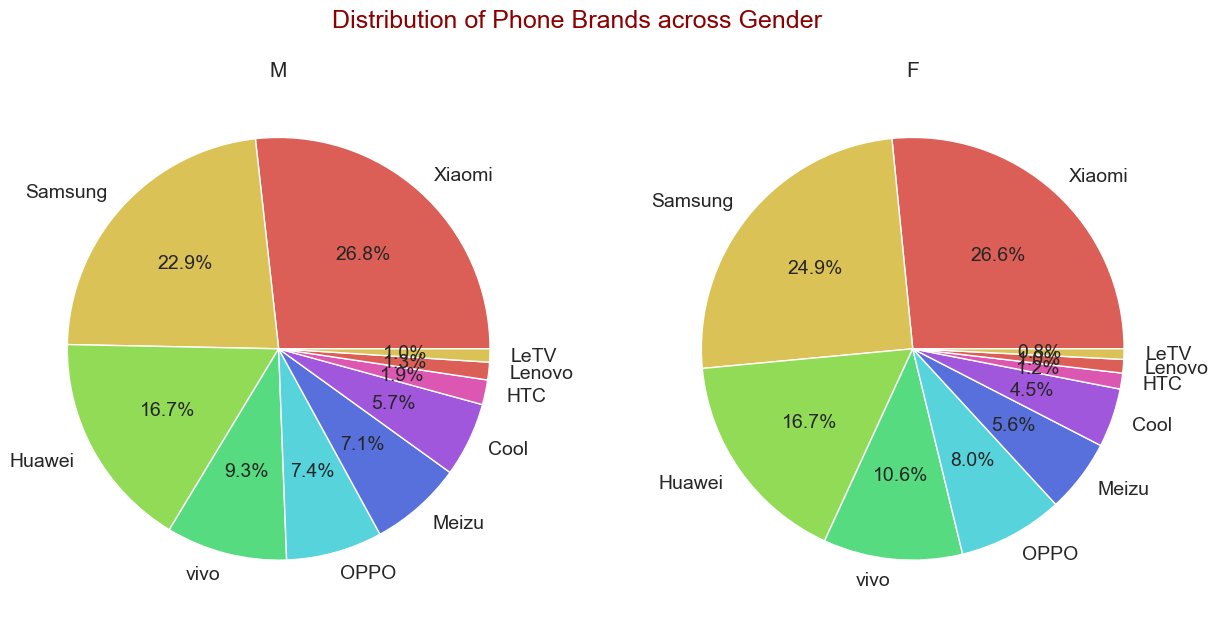

In [295]:
# Instantiate figure and axes object
fig = plt.figure(figsize=(15,7))
fig.suptitle("Distribution of Phone Brands across Gender", fontsize=18, color = 'darkred')

# Plot chart for each Gender under consideration
for n, gender in enumerate(['M','F']):
    ax = plt.subplot(1,2,n+1)
    top10_phonebrands_df['phone_brand'][top10_phonebrands_df['gender']==gender].value_counts().sort_values(ascending= False).plot.pie(autopct='%1.1f%%',
    ax=ax,fontsize = 14, colors=sns.color_palette("hls", 8))
    
    # Display the graph
    ax.set_title(gender, size = 15)
    ax.set_ylabel("")
    ax.set_xlabel("", size = 15)

**Xiaomi** is the leader when it comes to ownership across both genders at **26%**. However, **25%** of females prefer **Samsung** when compared to **23%** Males at **2nd** position.

### 6.a Distribution of Gender for each Phone Brand

In [225]:
top10_phonebrands_df.groupby('gender')['phone_brand'].value_counts(normalize=True)*100

gender  phone_brand
F       Xiaomi        26.57177
        Samsung       24.91103
        Huawei        16.66667
        vivo          10.64650
        OPPO           8.03677
        Meizu          5.60498
        Cool           4.50771
        HTC            1.21590
        Lenovo         1.03796
        LeTV           0.80071
M       Xiaomi        26.75532
        Samsung       22.92553
        Huawei        16.66667
        vivo           9.25532
        OPPO           7.35816
        Meizu          7.09220
        Cool           5.69149
        HTC            1.89716
        Lenovo         1.34752
        LeTV           1.01064
Name: phone_brand, dtype: float64

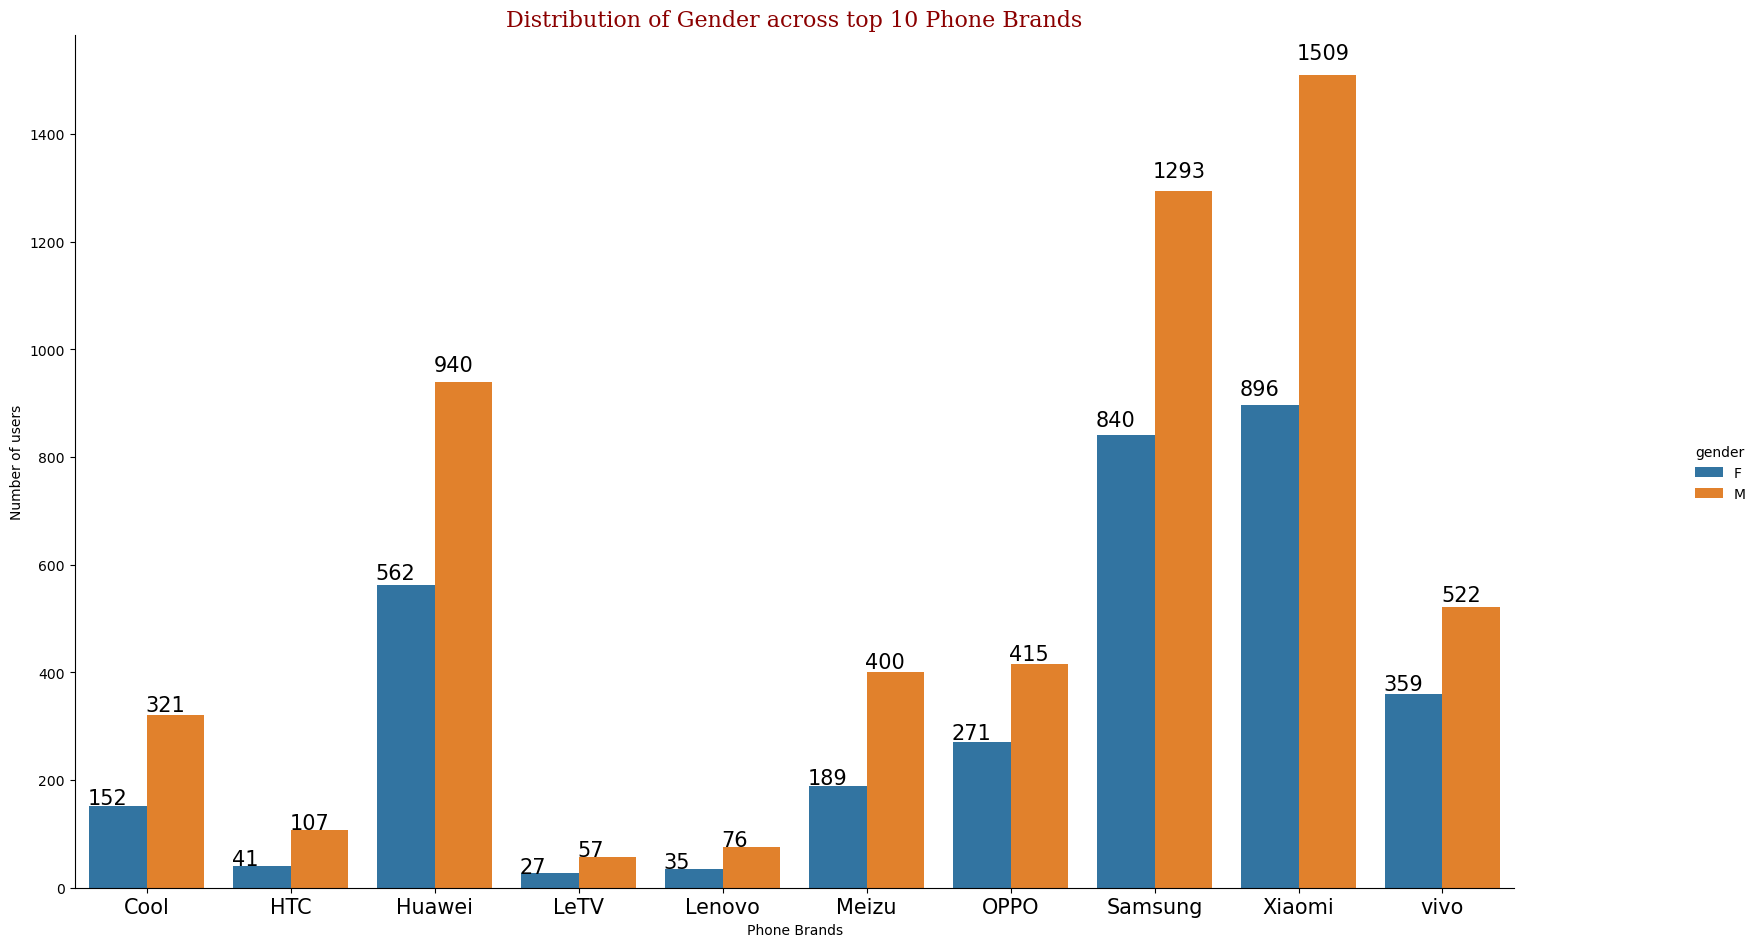

In [226]:
df = pd.DataFrame(top10_phonebrands_df.groupby(['gender','phone_brand'])['device_id'].nunique())
df.reset_index(level = [0,1] , inplace = True)

ax = sns.catplot(x='phone_brand', y='device_id', hue='gender', data= df ,kind='bar',palette='tab10')
a = ax.facet_axis(0, 0)

# iterate through the axes containers
for p in a.patches:
    a.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{}'.format(int(p.get_height())),
            color='black', 
            rotation='horizontal', 
            size=15)
    
ax.set_axis_labels("Phone Brands","Number of users")
ax.set_xticklabels(fontsize=15,rotation=0)
ax.fig.set_figwidth(20)
ax.fig.set_figheight(10)

plt.title("Distribution of Gender across top 10 Phone Brands",fontdict=font)
plt.show()

### 6.b Distribution of Gender for each State

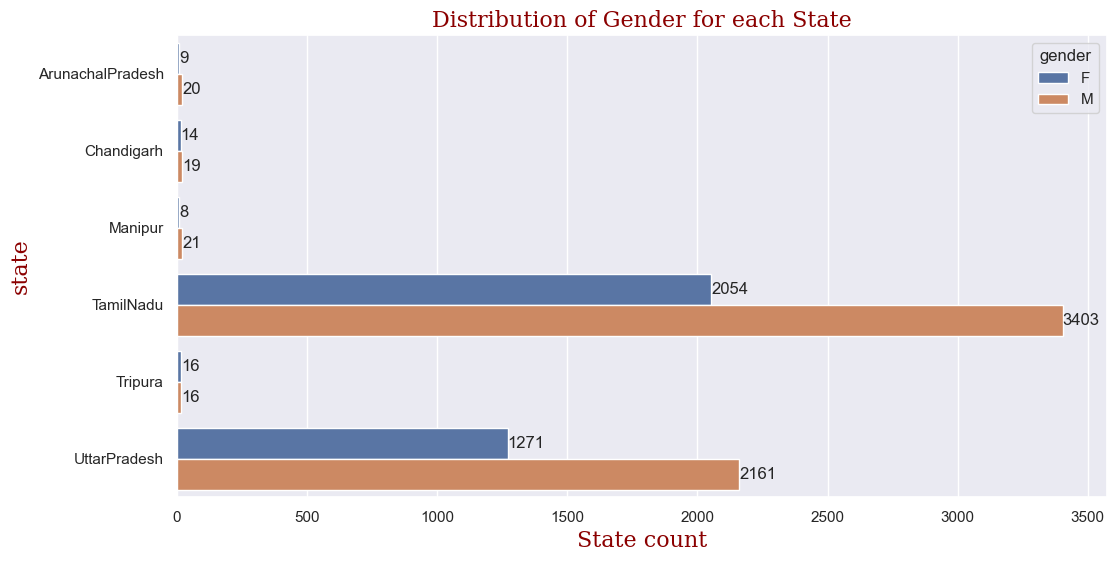

In [227]:
horizontalBarplot(top10_phonebrands_df,"state","gender","State count", "Distribution of Gender for each State")

### 6.c Distribution of Gender for each Age Segment 

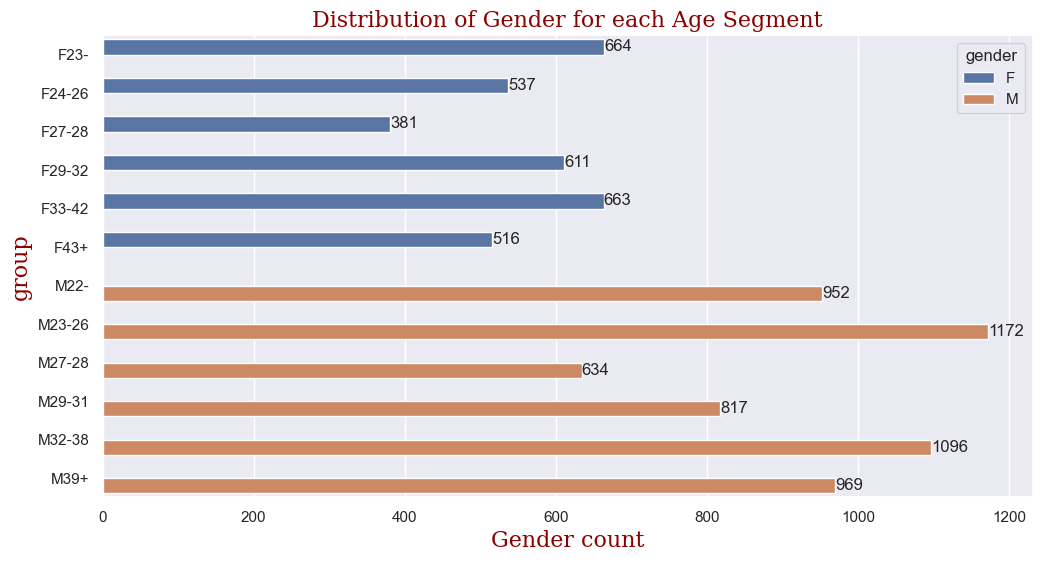

In [228]:
horizontalBarplot(top10_phonebrands_df,"group","gender","Gender count", "Distribution of Gender for each Age Segment")

In [229]:
events_age_phone_info_unique_df[events_age_phone_info_unique_df['gender'] == 'M']['Custom_Age_Group'].value_counts(normalize= True)*100

21-30   50.76975
31-40   26.45582
41-50    9.70549
11-20    8.65127
50+      4.40094
0-10     0.01673
Name: Custom_Age_Group, dtype: float64

In [230]:
events_age_phone_info_unique_df[events_age_phone_info_unique_df['gender'] == 'F']['Custom_Age_Group'].value_counts(normalize= True)*100

21-30   50.78608
31-40   24.56485
41-50   10.58394
50+      7.43964
11-20    6.62549
Name: Custom_Age_Group, dtype: float64

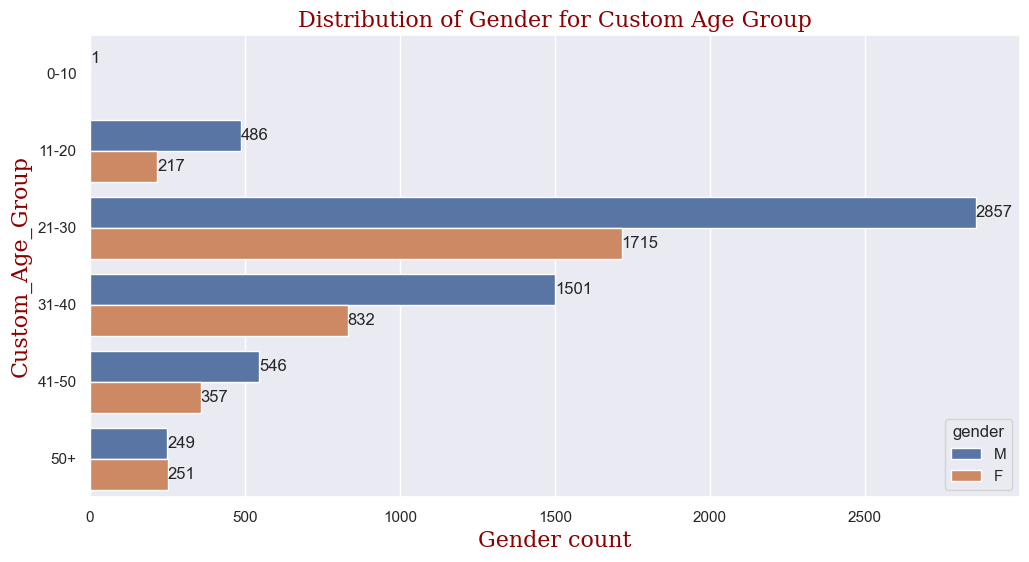

In [231]:
horizontalBarplot(top10_phonebrands_df,"Custom_Age_Group","gender","Gender count", "Distribution of Gender for Custom Age Group")

**Males** are dominating across age groups, states and phomne brand. However, **50+** age group is an **anamoly** where in **females outnumber males** by the **slightest of margins**.

### 7.a Distribution of Age Segments for each State

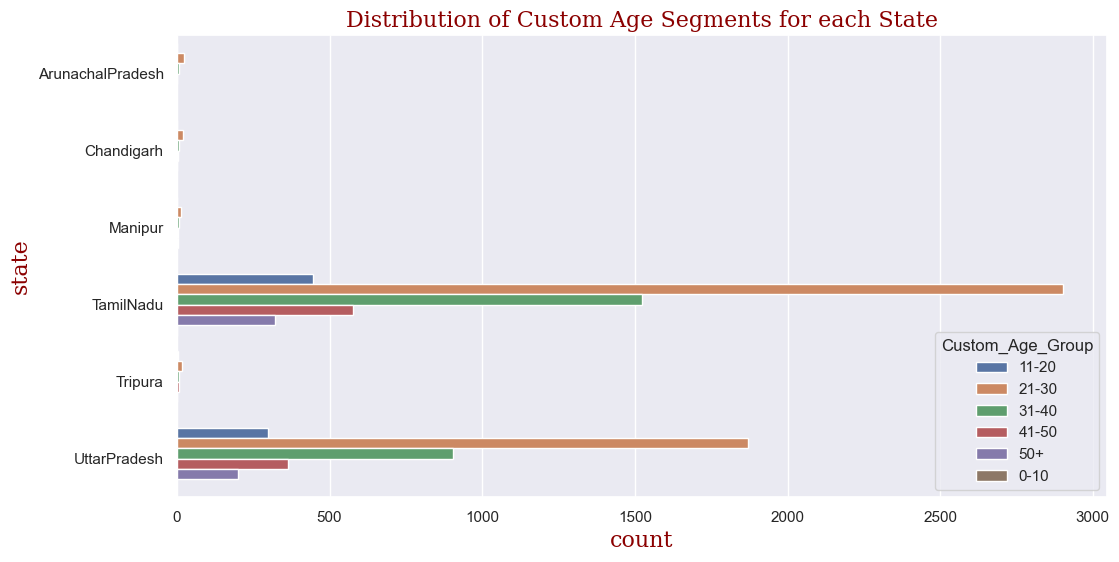

In [232]:
horizontalBarplot(events_age_phone_info_unique_df,"state","Custom_Age_Group","count", "Distribution of Custom Age Segments for each State","NO")

Those belonging to age group **21 to 30 years** are dominant in all states.

### 7.b Distribution of Age Segments for each Gender

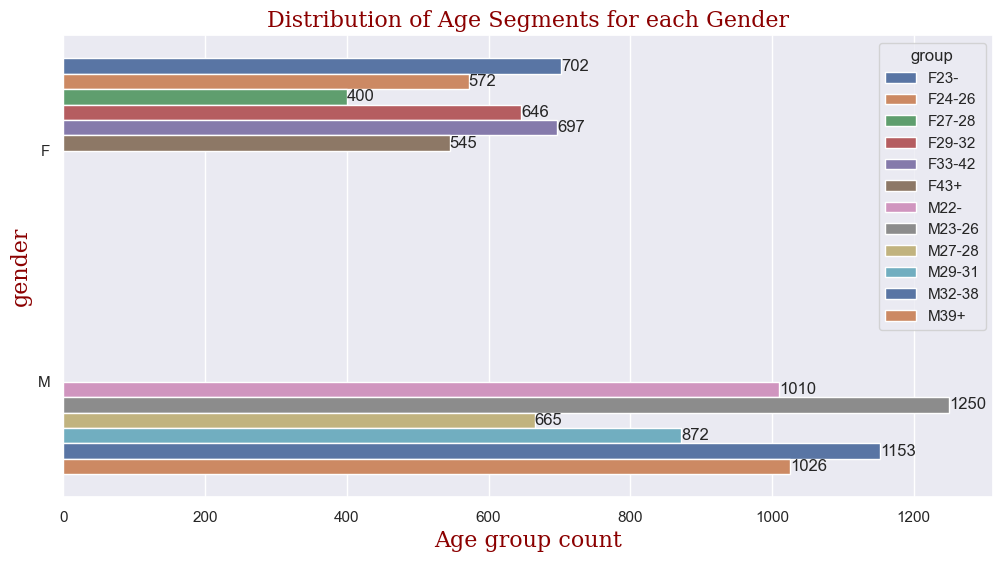

In [233]:
horizontalBarplot(events_age_phone_info_unique_df,"gender","group","Age group count", "Distribution of Age Segments for each Gender")

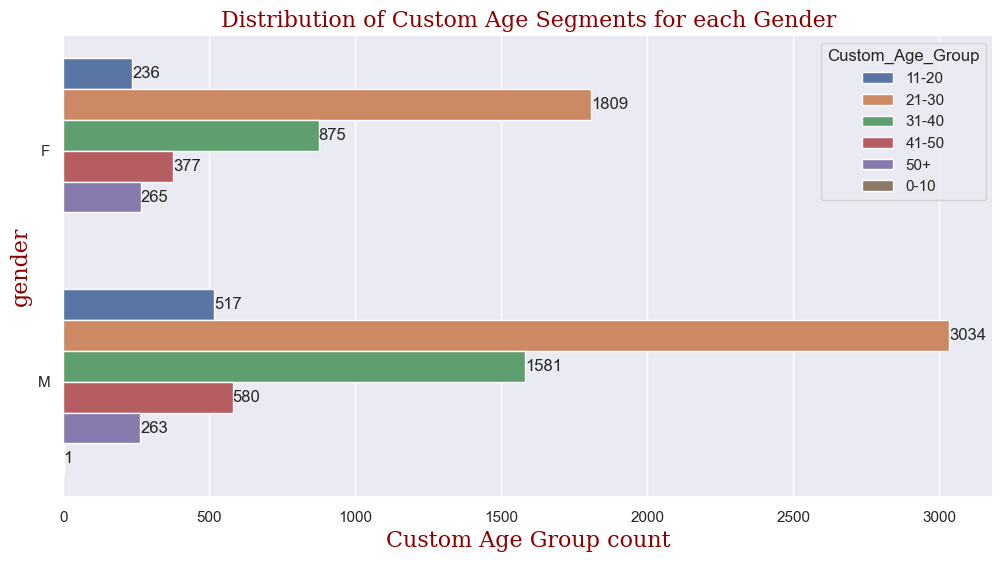

In [234]:
horizontalBarplot(events_age_phone_info_unique_df,"gender","Custom_Age_Group","Custom Age Group count", "Distribution of Custom Age Segments for each Gender")

**Male** users are more in all age segments **except for 50+** where **females** take the lead

### 7.c Distribution of Age Segments for each Phone Brand

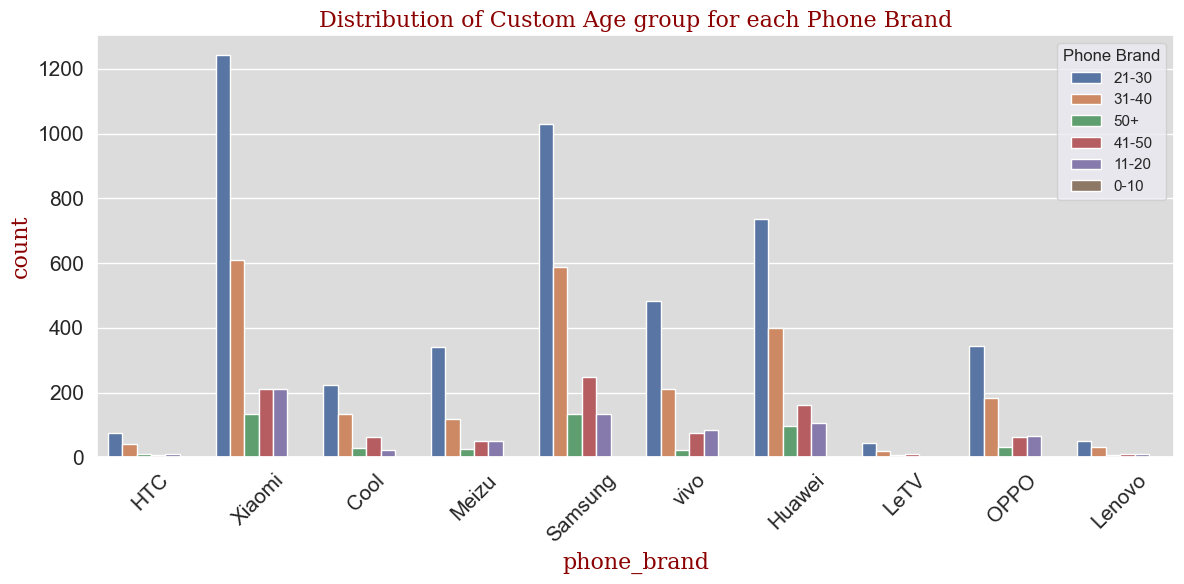

In [235]:
ax = sns.countplot('phone_brand', hue='Custom_Age_Group', data=top10_phonebrands_df)
plot(ax, 'Distribution of Custom Age group for each Phone Brand', legend="Phone Brand", displayBarLabel = "NO")

**Maximum users** belong to **21-30** age group amd **Xiaomi is the preferred brand** closely followed by Samsung

### 8. Hourly distribution of Phone Calls

In [236]:
events_age_phone_info_df["timestamp"].map(lambda t: t.date()).unique()

array([datetime.date(2016, 5, 3), datetime.date(2016, 5, 5),
       datetime.date(2016, 5, 2), datetime.date(2016, 5, 4),
       datetime.date(2016, 5, 1), datetime.date(2016, 5, 6),
       datetime.date(2016, 5, 7), datetime.date(2016, 4, 30)],
      dtype=object)

In [237]:
#Since there is data for 7 different dates, we will create a new feature 'hour' which will capture data across all these dates
events_age_phone_info_df['hour'] = events_age_phone_info_df['timestamp'].apply(lambda x: x.hour)
events_age_phone_info_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,hour
0,448114,5731369272434022400.00000,2016-05-03 13:21:16,80.34361,13.15333,Chennai,TamilNadu,M,26,M23-26,HTC,One max,13
1,2330011,5731369272434022400.00000,2016-05-05 12:44:32,80.34361,13.15333,Chennai,TamilNadu,M,26,M23-26,HTC,One max,12
2,1895687,5731369272434022400.00000,2016-05-02 12:45:05,80.34361,13.15333,Chennai,TamilNadu,M,26,M23-26,HTC,One max,12
3,619715,5731369272434022400.00000,2016-05-02 03:37:12,80.34361,13.15333,Chennai,TamilNadu,M,26,M23-26,HTC,One max,3
4,936200,5731369272434022400.00000,2016-05-04 19:18:59,80.34361,13.15333,Chennai,TamilNadu,M,26,M23-26,HTC,One max,19


In [238]:
events_age_phone_info_df['hour'].value_counts(normalize=True).head(10)*100

22   5.57229
0    5.54324
21   5.53930
20   5.42590
23   4.97587
19   4.97437
10   4.86753
18   4.62686
11   4.50240
13   4.41843
Name: hour, dtype: float64

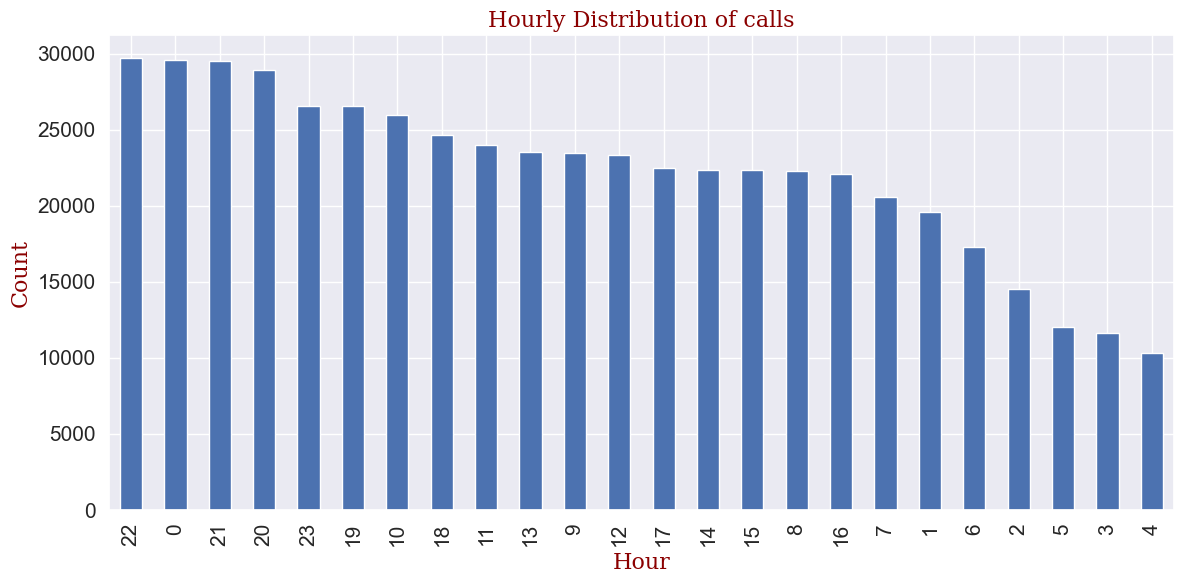

In [239]:
ax = events_age_phone_info_df['hour'].value_counts().plot(kind = 'bar')
plt.title("Hourly Distribution of calls", fontdict=font)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlabel("Hour", fontdict=font)
ax.set_ylabel("Count", fontdict=font)
plt.tight_layout()
plt.show()

### 9. Plot the Users on the Map using Folium.

In [ ]:
events_age_phone_info_unique_df.head()

In [ ]:
if(runFoliumAnalysis):
    unique_users_df = events_age_phone_info_unique_df[["latitude", "longitude", "city"]] 
    saveMap(unique_users_df,"Users_Plot.html")

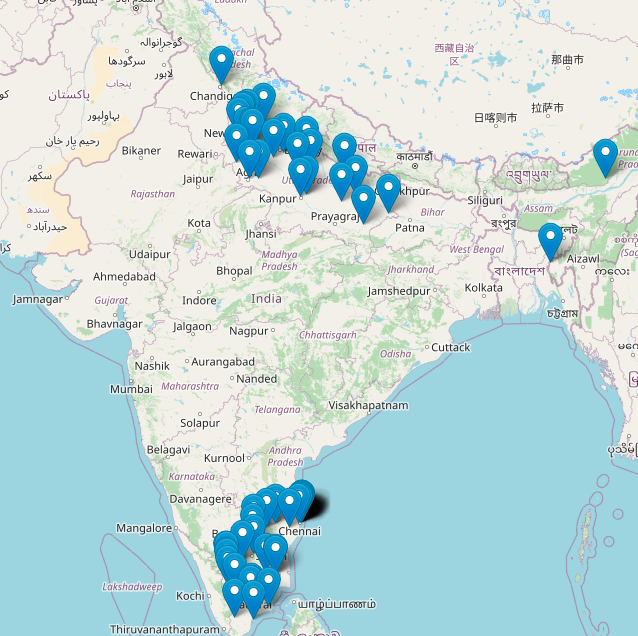

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- A total of **533515** entries were recorded for the six states/UT (**Tamil Nadu, Manipur, Chandigarh, Tripura, Uttar Pradesh, and Arunachal Pradesh**) based on the mobile usage behaviours.

- **9538 unique** users were identified spread across 6 states.

- **Tamil Nadu** stands out in terms of unique users at 5770(**60%**) when compared to **Uttar Pradesh** which is 2nd at 3635(**38%**) and other **4 states/UT** combined are **less than 150**.

- Majority of the market share (**84.4%**) is taken by **5 brands** with **Xiaomi** at **26.7%** followed by **Samsung** at **23.7%**, **Huawei** at **16.7**, **Vivo** at **9.8%** and **Oppo** at **7.6%**

- All age groups except **41-50** and **50+** prefer **Xiaomi** brand followed by **Samsung**. In **41-50** age group,   **Samsung brand** is preferred

- **Xiaomi** is the leader when it comes to ownership across both genders at **26%**. However, **25%** of females prefer Samsung when compared to  **23%** Males at 2nd position.

- **Xiaomi** is dominant among both the populous states **Tamil Nadu** and **Uttar Pradesh** with **27%** and **26.5%** share whereas **Samsung** holds the reins when it comes to smaller states/UT.

- **Males** constitute **62.7%** when compared to **Females** at **37.3%**

- In **Male** category, highest number of users (**1250**) are found in **23-26** age group whereas for **female** maximum users (**702**) are **below the age of 23**.

- **21-30** is the popular age group when it comes to ownership of mobile for both **male** and **females** contributing to a majority **50.7%**.

- All age groups except **41-50 and 50+** prefer **Xiaomi** brand followed by **Samsung**. In **41-50** age group though, **Samsung** brand is **preferred**

- Mobile usage is the highest in **10 PM - 11 PM** interval and **32%** of all usage is between **6 PM and 1 AM**

<a name = Section92></a>
### **9.2 Actionable Insights**


- Tamil Nadu and Uttar Pradesh are the two dominant states among the six considered for analysis.
- Product teams have to think about the appropriate feature set and pre-installed apps customized according to the preferences of different customer segments. <br>
Samsung has a good market share among 40+ age category. On the flipside though, Xiaomi is popular among the younger generation contributing to more revenue. On similar lines, Samsung is popular in smaller states, but Xiaomi is a winner in the bigger states - Tamil Nadu and Uttar Pradesh
- Marketing campaigns that focus on the segment of customers  belonging to age group 30 & above are recommended.
- App developers/marketing teams should consider conducting product launch/promotional activities at the later hours of the day, as most of the population is more active at these hours.
- Brand advertisers shall make relevant recommendations to the customers using precision marketing.